### GPU 연결 체크

In [14]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17102472295114241774
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1728525108
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11050403737880896185
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


# **1. 이미지 유사도**

In [1]:
import os
import numpy as np
from PIL import Image
import shutil

# 이미지 변환해서 캐시값을 저장(csv 파일로)
def average_hash(fname, cache_dirs, size=192):
    cache_dir = cache_dirs
    fname2 = fname[len(search_dir):]
    # 이미지 캐시하기
    cache_file = cache_dir + "/" + fname2.replace('/', '_') + ".csv"
    if not os.path.exists(cache_file):  # 해시 생성하기
        img = Image.open(fname)
        img = img.convert("L").resize((size, size), Image.ANTIALIAS)
        pixels = np.array(img.getdata()).reshape((size, size))
        avg = pixels.mean()
        px = 1 * (pixels > avg)
        np.savetxt(cache_file, px, fmt="%.0f", delimiter=",")
        print(f"Saved cache file: {cache_file}")
    else:  # 캐시돼 있다면 읽지 않기
        px = np.loadtxt(cache_file, delimiter=",")
        print(f"Loaded cache file: {cache_file}")
    return px

alternativePath = "C:/jupyter/capston/bald/data/erythema&follicles" # 기존 search_dir, cache_dir, output_dir에서 맨 뒤에 경로만 합쳐주면 됨
categories = ['mild', 'moderate']
cache_categories = ['cache_mild', 'cache_moderate']
refine_categories = ['refine_mild', 'refine_moderate']


# 반복1: mild, 반복2: moderate 
def main():
    for i in range(2):
        global search_dir, cache_dir, output_dir
        search_dir = alternativePath + "/" + categories[i]
        cache_dir = alternativePath + "/" + cache_categories[i]
        output_dir = alternativePath + "/" + refine_categories[i]
        if not os.path.exists(cache_dir):
            os.mkdir(cache_dir)
        if not os.path.exists(output_dir):
            os.mkdir(output_dir)

        # 이미지 평균값 계산하기
        cache_files = os.listdir(cache_dir)
        average_values = []
        for cache_file in cache_files:
            px = np.loadtxt(cache_dir + "/" + cache_file, delimiter=",")
            average_value = np.mean(px)
            average_values.append(average_value)

        # 평균값 출력하기
        average = np.mean(average_values)
        print(f"The average value is: {average}")
        
        print("경로: " + search_dir)
        print(categories[i] + " 실행")
        # 평균값에 가까운 이미지 686장을 refine_moderate 폴더에 저장하기
        image_files = os.listdir(search_dir)
        image_distances = []
        for image_file in image_files:
            image_path = search_dir + "/" + image_file
            px = average_hash(image_path, cache_dir)
            distance = np.mean(np.abs(px - average))
            image_distances.append((image_file, distance))

        # 거리가 작은 순으로 이미지 정렬하기
        image_distances.sort(key=lambda x: x[1])

        # 상위 1500개 이미지를 refine_moderate 폴더에 저장하기
        for i in range(1500):
            image_file = image_distances[i][0]
            source_path = search_dir + "/" + image_file
            destination_path = output_dir + "/" + image_file
            shutil.copyfile(source_path, destination_path)
            print(f"Copied image: {image_file} to {destination_path}")

# 메인 프로그램 실행
# main() 함수를 실행하고 그 안에 있는 glob_files()함수를 통해 양호 경증 중증도 중증 순으로 함수를 다시 호출한다
# glob_files()함수를 통해 x, y배열에 데이터를 다 집어넣고
# np.savez를 통해 .npz형식의 데이터 배열 파일을 저장하게 된다.
if __name__ == '__main__':
    main()

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\USER\AppData\Local\Temp\ipykernel_8628\2433534175.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.convert("L").resize((size, size), Image.ANTIALIAS)


The average value is: nan
경로: C:/jupyter/capston/bald/data/erythema&follicles/mild
mild 실행
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1602911366731_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1603096385510_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1603096790519_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1603096790519_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1603257373184_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1603257373184_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1603279597533_2_TH.jpg.csv
Saved cache file: C:/jupyte

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1605242408232_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1605242408232_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1605242408232_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1605242422804_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1605242422804_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1605242451450_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1605242469180_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0013_A2LEBJJDE00060O_1605242483496_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604637187763_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604637187763_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604637199091_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604637199091_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604637214216_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604637226775_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604637226775_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604637236889_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604644606784_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604644606784_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604644725397_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604644798002_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604644845258_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604644989841_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604644989841_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604644989841_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604901346499_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604901604818_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604901604818_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604901604818_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604901604818_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604901604818_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604904389794_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0131_A2LEBJJDE00166C_1604904462476_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1602915926827_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1602915926827_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1603076933941_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1603083735900_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1603083735900_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1603084673716_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1603085610244_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1603093264975_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1604536990441_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1604543625748_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1604543625748_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1604553778641_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1604553778641_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1604553778641_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1604628218940_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0335_A2LEBJJDE000542_1604717999611_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1603881306215_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1603881306215_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1603881306215_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1603881347942_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1603881347942_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1603881359132_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1603881359132_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1603881371319_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1605793940789_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1605793940789_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1605793950958_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1605793950958_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1605793962611_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1605793962611_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1605793974045_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0425_A2LEBJJDE00079P_1605793992832_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603420850823_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603424523940_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603424523940_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603424523940_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603440289458_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603442516679_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603442516679_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603449099725_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603795643978_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603800043394_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603800043394_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603800043394_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603800074344_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603800089607_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603800089607_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0556_A2LEBJJDE00041T_1603800109630_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1603270872982_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1603270872982_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1603270872982_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1603330599241_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1603330599241_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1603330599241_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1603331127226_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1603331127226_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1605868022658_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1605868022658_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1605868185330_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1605868185330_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1605868260188_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1605868260188_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1605868407728_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0616_A2LEBJJDE00004W_1605868407728_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0617_A2LEBJJDE000815_1604376514538_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0617_A2LEBJJDE000815_1604376514538_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0617_A2LEBJJDE000815_1604376514538_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0617_A2LEBJJDE000815_1604376535669_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0617_A2LEBJJDE000815_1604573812542_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0617_A2LEBJJDE000815_1604573857181_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0617_A2LEBJJDE000815_1604573908495_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0617_A2LEBJJDE000815_1604573908495_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0643_A2LEBJJDE00048F_1605668841696_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0643_A2LEBJJDE00048F_1605670073588_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0643_A2LEBJJDE00048F_1605670073588_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0643_A2LEBJJDE00048F_1605670436909_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0663_A2LEBJJDE001716_1604647691055_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0663_A2LEBJJDE001716_1604647979954_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0663_A2LEBJJDE001716_1604647979954_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0663_A2LEBJJDE001716_1604648335633_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0663_A2LEBJJDE001716_1605078407278_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0663_A2LEBJJDE001716_1605231315981_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0663_A2LEBJJDE001716_1605231315981_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0663_A2LEBJJDE001716_1605231315981_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0663_A2LEBJJDE001716_1605234382283_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0663_A2LEBJJDE001716_1605234382283_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0663_A2LEBJJDE001716_1605248302887_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0663_A2LEBJJDE001716_1605248710084_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1603692438318_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1603692438318_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1603694098108_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1603694098108_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1603694098108_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1603694098108_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1603705832858_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1603772444216_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605057330328_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605057683967_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605057683967_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605068207971_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605068207971_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605068207971_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605068207971_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605069171180_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605925139437_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605925139437_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605926552394_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605926552394_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605929091876_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605929091876_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605929091876_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0703_A2LEBJJDE000774_1605933133745_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1602651616902_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1602659291559_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1602665560909_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1602665560909_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1602673543076_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1602673543076_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1602727621672_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1602727621672_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603170571895_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603170571895_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603170571895_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603170571895_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603186424072_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603189164882_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603189164882_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603244866141_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603875688495_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603882737712_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603882737712_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603882737712_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603933749491_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603933749491_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603958254533_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0733_A2LEBJJDE000084_1603958254533_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1602843570925_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1602845148440_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1602845148440_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1602897513267_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1602897710491_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1602897710491_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1602898103597_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1602898103597_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603006708686_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603006708686_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603006708686_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603007405624_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603007587123_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603007587123_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603014448727_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603018103335_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603872986593_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603872986593_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603882786965_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603882786965_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603882786965_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603944827877_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603957082550_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0770_A2LEBJJDE000865_1603957082550_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1602914276701_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1602914286368_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1602914286368_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1602914286368_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1602914286368_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1602914296220_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1602914296220_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1602914296220_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1602983359572_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1602984707473_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1603000009977_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1603000009977_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1603273027841_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1603273027841_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1603273027841_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1603423501017_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1604134461405_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1604134461405_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1604196349002_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1604196349002_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1604196349002_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1604199084362_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1604199084362_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1604199084362_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1605925125819_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1605925125819_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1605925334078_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1605925334078_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0844_A2LEBJJDE00067A_1605925334078_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1603690127802_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1603690127802_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1603692863236_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604030158436_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604030158436_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604034249646_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604042790257_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604042790257_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604044770399_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604044770399_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604044770399_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604384837334_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604389839482_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604389839482_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604389839482_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604394079339_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604394079339_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604394079339_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1604395435190_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1605248849781_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1605248849781_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1605248849781_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1605249757496_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1605601873607_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1605601873607_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1605844108012_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_0888_A2LEBJJDE001948_1605844108012_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1602918538335_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1602919533792_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1602919533792_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1602921102122_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1602921102122_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1602921846004_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1602921846004_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1602922651897_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1603084633159_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1603088698099_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1603088698099_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1603088698099_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1603089099739_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1603089099739_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1603089980464_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1603090969884_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1603274201430_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1603274201430_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1603274201430_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1605854005656_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1605854005656_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1015_A2LEBJJDE000592_1605854005656_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1069_A2LEBJJDE00094D_1602920290649_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1069_A2LEBJJDE00094D_1602920290649_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1069_A2LEBJJDE00094D_1605064800444_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1069_A2LEBJJDE00094D_1605064800444_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1069_A2LEBJJDE00094D_1605169667071_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1069_A2LEBJJDE00094D_1605169667071_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1069_A2LEBJJDE00094D_1605172902037_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1069_A2LEBJJDE00094D_1605319123136_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1069_A2LEBJJDE00094D_1605319123136_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1069_A2LEBJJDE00094D_1605319123136_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1604931375770_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1604931409718_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1604931409718_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1604931424488_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1604931424488_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1604931469470_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1604931469470_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1604931469470_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1605002470903_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1605002470903_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1605002486908_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1605002498553_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1605002498553_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1605002498553_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1605002498553_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1071_A2LEBJJDE00173R_1605089158117_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1080_A2LEBJJDE00092R_1604138398171_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1080_A2LEBJJDE00092R_1604138398171_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1080_A2LEBJJDE00092R_1604375407651_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1080_A2LEBJJDE00092R_1604625069009_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1080_A2LEBJJDE00092R_1604625069009_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1080_A2LEBJJDE00092R_1604627549594_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1080_A2LEBJJDE00092R_1604627549594_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1080_A2LEBJJDE00092R_1604647415549_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1602662511389_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1602674224132_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1602674224132_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1602740799072_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1602740799072_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1602740799072_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1602740799072_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1602741050801_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1604473223146_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1604473223146_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1604474343339_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1604474343339_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1604646643012_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1604646643012_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1604646643012_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1142_A2LEBJJDE00024K_1604723601951_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1603192353636_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1603350179626_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1603350179626_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1603350179626_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1603415366312_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1603415366312_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1603415366312_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1603509075025_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1604747333046_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1604748208108_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1604749388669_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1604749388669_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1604749388669_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1604892937163_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1604892937163_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1145_A2LEBJJDE00119L_1604892937163_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1602838465325_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1602838465325_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1602838475091_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1602838484967_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1602838484967_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1602838532152_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1602838532152_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1602838555005_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1603342625250_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1603342625250_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1603360024289_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1603419071363_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1603419101988_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1603421173576_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1603422170349_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00117Z_1603422170349_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604302470579_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604302470579_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604304116566_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604373363701_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604373363701_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604373363701_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604373363701_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604373363701_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604802064961_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604802064961_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604802313294_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604802313294_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604802313294_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604802313294_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604803712873_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1604803712873_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1605172142167_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1605236132115_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1605236132115_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1605244212423_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1605254582774_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1605321617357_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1605327861468_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1195_A2LEBJJDE00197M_1605334342113_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1407_A2LEBJJDE001258_1602903065917_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1407_A2LEBJJDE001258_1602992609398_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1407_A2LEBJJDE001258_1602992609398_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1407_A2LEBJJDE001258_1603009288435_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1407_A2LEBJJDE001258_1603009288435_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1407_A2LEBJJDE001258_1603014779399_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1407_A2LEBJJDE001258_1603014779399_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1407_A2LEBJJDE001258_1603014779399_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1602652969368_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1602652985505_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1602652985505_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1602652985505_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1602653001444_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1602653001444_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1602653015423_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1602653015423_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1603267613377_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1603267613377_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1603267613377_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1603267613377_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1603269742090_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1603269742090_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1603269742090_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1603269742090_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604127239539_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604127239539_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604127239539_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604131993501_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604131993501_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604131993501_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604133699610_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604133699610_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604834415783_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604834415783_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604834415783_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604891742334_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604891742334_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604919516804_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604919516804_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1459_A2LEBJJDE00025D_1604919516804_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1602999565394_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1603011633158_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1603011633158_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1603011633158_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1603087278043_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1603087278043_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1603087630455_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1603087630455_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1604636088506_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1604636088506_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1604637102630_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1604637102630_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1604653405403_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1604653405403_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1604653707098_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1534_A2LEBJJDE00133G_1604653707098_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00163X_1605618698360_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00163X_1605618698360_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00163X_1605618711600_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00163X_1605618711600_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00163X_1605618711600_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00163X_1605618724611_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00163X_1605618724611_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00163X_1605618724611_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604400133436_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604400133436_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604400133436_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604400151092_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604400151092_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604400171190_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604400171190_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604400184476_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604824456053_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604824456053_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604824456053_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604824503430_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604824503430_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604824503430_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604824751166_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1631_A2LEBJJDE00187S_1604824751166_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1603247696031_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1603333407175_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1603333407175_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1603357275526_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1603441608254_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1603507131723_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1603507131723_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1603516933909_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1604127730408_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1604134680288_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1604134680288_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1604209672222_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1604209672222_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1604371834620_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1604371834620_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1719_A2LEBJJDE00138G_1604371834620_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1603264049297_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1603264049297_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1603265687971_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1603281353774_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1603281353774_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1603281353774_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1603281521066_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1603281521066_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1605234896953_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1605234896953_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1605342094640_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1605342094640_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1605342094640_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1605348705950_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1605348705950_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1743_A2LEBJJDE00031Z_1605348705950_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602558733757_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602558733757_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602558750923_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602558774547_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602558774547_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602558774547_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602559091166_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602559608460_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602830256307_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602830256307_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602832021468_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602832021468_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602832021468_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602832021468_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602832021468_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602835087961_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602984740168_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602986506269_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602986506269_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602986506269_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602986506269_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602988147247_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602988147247_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1798_A2LEBJJDE000539_1602988147247_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1602847902074_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1602847902074_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1602847902074_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1602847915922_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1602847915922_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1602847915922_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1602847915922_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1602847971349_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1603706090453_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1603706106694_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1603706123037_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1603706137252_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1603706137252_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1603706137252_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1603706137252_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1603961716845_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1605435076252_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1605435076252_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1605435090515_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1605435104629_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1605435104629_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1605435119838_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1605435119838_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1940_A2LEBJJDE000307_1605435119838_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1981_A2LEBJJDE001901_1605680795647_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1981_A2LEBJJDE001901_1605681003335_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1981_A2LEBJJDE001901_1605773213850_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1981_A2LEBJJDE001901_1605781671469_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1981_A2LEBJJDE001901_1605781671469_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1981_A2LEBJJDE001901_1605781938145_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1981_A2LEBJJDE001901_1605782231385_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_1981_A2LEBJJDE001901_1605782968678_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1602935756597_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1602935756597_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1602935756597_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603004963987_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603004963987_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603004963987_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603004963987_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603008166327_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603337688501_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603351025608_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603351025608_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603351025608_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603353142017_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603353142017_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603362125794_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603363303282_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603607708919_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603607708919_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603615928409_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603615928409_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603616688229_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603617128684_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603617128684_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1603617128684_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1605169609465_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1605169609465_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1605174586844_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1605253453944_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1605254530766_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1605254530766_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1605257260347_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2013_A2LEBJJDE00141O_1605257260347_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2032_A2LEBJJDE00152B_1605691981458_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2032_A2LEBJJDE00152B_1605751214624_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2032_A2LEBJJDE00152B_1605751214624_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2032_A2LEBJJDE00152B_1605751214624_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2032_A2LEBJJDE00152B_1605923915500_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2032_A2LEBJJDE00152B_1605923915500_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2032_A2LEBJJDE00152B_1605923915500_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2032_A2LEBJJDE00152B_1605937653758_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604485883667_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604485883667_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604485883667_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604485883667_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604488526973_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604488526973_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604488526973_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604549574422_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604736815309_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604740090711_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604740090711_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604740090711_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604740090711_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604795529006_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604795529006_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1604795529006_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2317_A2LEBJJDE00051N_1605248758456_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1602479081269_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1602479081269_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1602479504381_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1602479504381_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1603160313930_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1603160313930_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1603160313930_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1604626897814_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1604626935181_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1604626935181_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1604626962317_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1604626962317_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1604626962317_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1604626962317_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1604626996557_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1605769413826_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1605769413826_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1605769440725_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1605769474336_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1605770910688_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1605770910688_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1605773185126_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00037S_1605773185126_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1602907680259_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1602907680259_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1602907680259_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1602907680259_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1602907974145_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1602921787079_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1602921787079_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1602921787079_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1603879627669_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1603879627669_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1603945186382_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1603945186382_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1603945186382_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1604024337596_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1604024337596_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE00056N_1604026533427_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001026_1602923158901_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001026_1602923158901_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001026_1602923158901_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001026_1602923158901_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001026_1602923474849_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001026_1602923474849_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001026_1602923474849_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001026_1602923474849_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1603344070713_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1603344070713_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1603344857545_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1603344857545_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1603350737001_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1603350737001_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1603350737001_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1603360165619_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604024860211_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604024860211_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604036389704_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604036389704_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604038338238_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604038338238_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604038338238_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604114475470_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604822578173_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604826042278_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604826042278_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604826042278_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604826042278_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604891311046_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604891311046_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2326_A2LEBJJDE001998_1604895077622_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1603424353488_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1603424353488_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1603428474652_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1603428474652_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1603428474652_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1603437734048_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1603437734048_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1603533828877_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1604636545111_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1604636545111_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1604638173830_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1604638173830_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1604638173830_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1604638173830_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1604638740668_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1604638740668_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1604999366108_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1604999366108_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1604999366108_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1605060701748_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1605075096076_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1605075096076_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1605075096076_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2327_A2LEBJJDE00091Y_1605154209177_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860070816_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860070816_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860122741_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860122741_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860122741_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860145834_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860145834_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860145834_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860504024_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860504024_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860519735_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860532497_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860532497_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860532497_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860532497_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605860558395_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605861488340_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605861488340_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605861488340_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605861509382_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605861509382_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605861509382_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605861509382_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605861520412_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605861852619_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605861861790_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605861861790_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605861872455_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2379_A2LEBJJDE00172Y_1605861872455_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1602641643921_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1602641643921_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1602840948213_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1603770177586_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1603770177586_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1603770177586_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1603934846839_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1603934846839_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1603934846839_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1603936849260_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1603936849260_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1604564536871_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1604564536871_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1604566328637_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1604566328637_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1604566328637_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1604566328637_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1604566328637_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1604726553445_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1605770231174_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1605770231174_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1605770231174_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1605773812183_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1605841061370_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1605845115277_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1605845375547_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE000175_1605845375547_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1603265568355_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1603265568355_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1603269727574_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1603272881123_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1603272881123_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1603272881123_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1603332187719_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1603332187719_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604042174023_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604042174023_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604042174023_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604112370487_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604112370487_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604112370487_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604112370487_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604113523237_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604729704599_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604729704599_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604729704599_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604729704599_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604745074379_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604745074379_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604812850275_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2404_A2LEBJJDE00020D_1604812850275_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1603697293410_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1603697293410_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1603697293410_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1603697293410_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1603703744846_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1603703744846_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1603704026466_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1603704026466_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1604378611042_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1604389572378_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1604389572378_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1604400311352_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1604400311352_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1604400311352_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1604457581643_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1604457581643_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1605427295187_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1605428501671_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1605436849482_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1605436849482_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1605506236323_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2469_A2LEBJJDE00019Q_1605506451860_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2479_A2LEBJJDE00147H_1602829432806_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2479_A2LEBJJDE00147H_1602829432806_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2479_A2LEBJJDE00147H_1603329131961_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2479_A2LEBJJDE00147H_1603331319124_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2479_A2LEBJJDE00147H_1603331319124_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2479_A2LEBJJDE00147H_1603335341400_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2479_A2LEBJJDE00147H_1603335341400_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2479_A2LEBJJDE00147H_1603335902020_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2479_A2LEBJJDE00147H_1603335902020_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2479_A2LEBJJDE00147H_1603335902020_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602577486662_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602577486662_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602577506004_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602577506004_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602577506004_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602577506004_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602577517182_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602577517182_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602902542831_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602902542831_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602902542831_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602902542831_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602913034187_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602913034187_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602925128178_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1602925128178_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603340682814_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603340682814_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603345047131_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603345047131_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603345047131_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603345047131_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603345405765_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603345405765_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603965565859_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603965565859_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603965565859_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603965869637_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603965869637_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603967425304_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1603967425304_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2487_A2LEBJJDE00050U_1604022007164_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1604397380577_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1604455857723_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1604455857723_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1604458775547_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1604472349835_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1604472349835_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1604472349835_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1604473194469_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1605338305027_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1605338305027_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1605338336821_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1605338336821_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1605338336821_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1605338369082_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1605338369082_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2522_A2LEBJJDE00014Q_1605338386935_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602829680191_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602829680191_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602831457598_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602831457598_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602832262446_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602832262446_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602834541428_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602834761353_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602921475621_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602922644867_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602922644867_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602922644867_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602922862111_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602922862111_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602922862111_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1602923082695_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603095817656_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603095817656_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603095817656_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603095817656_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603097036096_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603097036096_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603097036096_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603097223320_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603337861135_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603339644392_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603343208916_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603343208916_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603343208916_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603343208916_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603347592763_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2533_A2LEBJJDE00131U_1603347592763_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1602833549493_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1602833549493_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1602894416477_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1602894416477_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1602894416477_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1602897293461_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1602897293461_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1602909223859_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1603516613964_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1603516613964_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1603516613964_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1603518737372_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1603526909175_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1603526909175_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1603528024718_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1603586943621_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1604035124084_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1604035124084_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1604037721983_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1604037721983_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1604041796835_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1604041796835_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1604041796835_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2585_A2LEBJJDE001302_1604041796835_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00091Y_1603244252266_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00091Y_1603244259872_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00091Y_1603244259872_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00091Y_1603244259872_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00091Y_1603244267686_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00091Y_1603244267686_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00091Y_1603244267686_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00091Y_1603244267686_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1602911998049_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1602913643636_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1602913643636_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1602913988732_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1602913988732_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1602913988732_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1602916935325_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1602916935325_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1603513812127_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1603513812127_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1603513812127_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1603517837235_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1603518241228_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1603519816637_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1603519816637_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1603519816637_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1604056373668_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1604056373668_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1604109677696_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1604109677696_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1604109677696_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1604109677696_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1604110117538_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2637_A2LEBJJDE00099D_1604110117538_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1602824365792_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1602824365792_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1602824365792_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1602824365792_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1602824768995_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1602824768995_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1602824768995_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1602826058751_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1604382676146_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1604386499780_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1604386499780_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1604386499780_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1604386499780_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1604387652731_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1604387652731_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1604387652731_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1605863788800_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1605865746746_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1605933661197_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1605933661197_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2688_A2LEBJJDE00115E_1605940426268_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2709_A2LEBJJDE000216_1602660656461_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2709_A2LEBJJDE000216_1602668815181_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2709_A2LEBJJDE000216_1602668828716_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2709_A2LEBJJDE000216_1604570914532_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2709_A2LEBJJDE000216_1604632791753_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2709_A2LEBJJDE000216_1604632791753_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2709_A2LEBJJDE000216_1604632791753_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2709_A2LEBJJDE000216_1604645816727_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2709_A2LEBJJDE000216_1604645816727_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2709_A2LEBJJDE000216_1604659150169_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2709_A2LEBJJDE000216_1604724593576_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2720_A2LEBJJDE000401_1604642588768_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2720_A2LEBJJDE000401_1604712614605_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2720_A2LEBJJDE000401_1604712614605_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2720_A2LEBJJDE000401_1604713039998_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2720_A2LEBJJDE000401_1604713039998_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2720_A2LEBJJDE000401_1604714517329_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2720_A2LEBJJDE000401_1604714517329_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2720_A2LEBJJDE000401_1604716688036_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604122422645_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604124798421_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604124798421_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604124990440_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604124990440_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604124990440_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604124990440_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604125251976_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604729951490_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604729951490_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604732505522_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604800123614_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604809041014_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604809041014_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604809041014_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE000498_1604815914080_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1604897612285_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1604897892575_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1604897892575_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1604912195394_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1604912195394_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1604912195394_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1604912195394_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1604912540988_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605147137768_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605147341066_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605147341066_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605147529221_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605147716128_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605147914705_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605147914705_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605147914705_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605358141965_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605358141965_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605358141965_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605358172828_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605358172828_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605358191121_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605358191121_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2762_A2LEBJJDE00169Q_1605358222276_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1602639527695_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1602639527695_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1602639527695_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1602639527695_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1602639541726_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1602639541726_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1602639541726_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1602640985244_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1604628247224_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1604628247224_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1604629350002_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1604629350002_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1604650402258_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1604650402258_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1604650402258_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1604650402258_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1605934724335_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1605934724335_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1605939037112_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2800_A2LEBJJDE00036Z_1605939037112_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2820_A2LEBJJDE00179K_1604128761881_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2820_A2LEBJJDE00179K_1604128761881_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2820_A2LEBJJDE00179K_1604128761881_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2820_A2LEBJJDE00179K_1604372451124_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2820_A2LEBJJDE00179K_1605011339503_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2820_A2LEBJJDE00179K_1605011355482_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2820_A2LEBJJDE00179K_1605011355482_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2820_A2LEBJJDE00179K_1605011355482_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2820_A2LEBJJDE00179K_1605011373243_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2820_A2LEBJJDE00179K_1605011384433_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2820_A2LEBJJDE00179K_1605011384433_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2820_A2LEBJJDE00179K_1605011400985_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1602641459327_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1602641459327_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1602727858792_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1602727858792_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1602727858792_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1602736428090_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1602736428090_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1602738181968_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1604640199349_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1604641446514_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1604641446514_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1604645331212_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1604645331212_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1604645331212_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1604711536739_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1604711536739_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1605921819838_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1605921819838_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1605925309317_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1605925309317_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1605932005938_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1605933244384_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1605933244384_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2950_A2LEBJJDE00084J_1605937898308_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1603423407666_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1603423407666_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1603437307964_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1603437752599_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1603437752599_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1603437752599_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1603438924559_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1603440934571_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604049282249_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604053686049_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604053686049_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604055889871_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604055889871_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604055889871_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604119563095_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604119563095_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604808963038_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604810110300_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604810110300_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604810110300_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604810110300_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604814903931_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604817303470_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2959_A2LEBJJDE00097R_1604817303470_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2983_A2LEBJJDE001261_1604201249914_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2983_A2LEBJJDE001261_1604201249914_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2983_A2LEBJJDE001261_1604201249914_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2983_A2LEBJJDE001261_1604201249914_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2983_A2LEBJJDE001261_1604211181062_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2983_A2LEBJJDE001261_1604221787062_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2983_A2LEBJJDE001261_1604281883088_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2983_A2LEBJJDE001261_1604281883088_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2996_A2LEBJJDE00083Q_1605759844196_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2996_A2LEBJJDE00083Q_1605759844196_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2996_A2LEBJJDE00083Q_1605759844196_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2996_A2LEBJJDE00083Q_1605760051171_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2996_A2LEBJJDE00083Q_1605760051171_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2996_A2LEBJJDE00083Q_1605779528078_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2996_A2LEBJJDE00083Q_1605843643569_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_2996_A2LEBJJDE00083Q_1605843643569_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1603351040123_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1603351040123_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1603351040123_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1603351055251_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1603351055251_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1603351055251_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1603351055251_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1603351070907_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1604887620671_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1604887620671_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1604896354164_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1604896354164_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1604896354164_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1604896354164_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1605062208024_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3046_A2LEBJJDE00089J_1605062709832_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1602755526638_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1602759925366_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1602905335224_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1602905335224_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1602905335224_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1602905335224_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1603017743679_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1603017743679_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1604555487087_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1604659411768_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1604659411768_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1604659411768_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1604659411768_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1605001675904_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1605001675904_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3065_A2LEBJJDE00103Y_1605001675904_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603009840885_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603010677819_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603010677819_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603010677819_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603011949363_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603011949363_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603012474122_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603088941562_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603257699288_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603257699288_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603257699288_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603257699288_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603258466158_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603258466158_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603258466158_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3085_A2LEBJJDE00128M_1603258466158_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605039955765_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605039980624_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605039980624_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605040002423_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605040002423_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605040002423_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605040028590_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605040028590_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605714055611_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605939046040_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605939046040_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605939617101_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605939617101_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605940097299_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3275_A2LEBJJDE001766_1605940097299_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1602576087309_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603093270957_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603093270957_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603171066017_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603171066017_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603171066017_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603186028491_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603186028491_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603186028491_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603610422875_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603850316708_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603850316708_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603859156409_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603859156409_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603863987437_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603863987437_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1603863987437_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1605336599098_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1605336599098_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1605336599098_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1605343151278_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1605343151278_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1605406199855_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1605408045517_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3332_A2LEBJJDE00100K_1605416672192_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1602574440461_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1602574440461_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1602574440461_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1602579110366_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1602579110366_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1602579110366_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1602640721949_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1602640721949_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1603084786381_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1603084786381_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1603084786381_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1603271670422_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1603271670422_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1603272032687_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1603272032687_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1603272032687_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1604486511318_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1604486511318_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1604486511318_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1604570844560_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1604658455860_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1604658455860_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1604728820738_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3339_A2LEBJJDE00057G_1604799247466_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1602933543546_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1603001068097_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1603001068097_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1603074055612_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1603074055612_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1603074055612_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1603076352381_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1603076352381_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1605607906625_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1605607906625_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1605607906625_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1605607906625_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1605607906625_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1605608383086_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1605608383086_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3365_A2LEBJJDE00106D_1605608383086_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1603006492601_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1603006492601_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1603008761651_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1603012025186_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1603012500503_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1603012500503_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1603012500503_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1603013043243_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1604799513537_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1604799513537_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1604799513537_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1604807079690_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1604807079690_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1604807079690_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1604820937559_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3588_A2LEBJJDE00108Y_1604820937559_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602469357493_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602469357493_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602470053359_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602470053359_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602470053359_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602473365364_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602473365364_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602473365364_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602897750607_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602897750607_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602898576502_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602898576502_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602898591191_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602899552931_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602902577874_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1602902577874_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1603267494049_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1603267494049_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1603275533918_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1603275533918_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1603275533918_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1603275919919_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1603275919919_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3654_A2LEBJJDE00016C_1603275919919_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3677_A2LEBJJDE00087X_1605753611337_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3677_A2LEBJJDE00087X_1605753611337_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3677_A2LEBJJDE00087X_1605753681758_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3677_A2LEBJJDE00087X_1605753681758_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3677_A2LEBJJDE00087X_1605772411268_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3677_A2LEBJJDE00087X_1605836376852_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3677_A2LEBJJDE00087X_1605838638671_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3677_A2LEBJJDE00087X_1605924896539_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1603200259527_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1603200259527_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1603200325158_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1603200325158_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1603200325158_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1603200325158_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1603200325158_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1603200348581_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1604037623336_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1604037623336_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1604037623336_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1604061339383_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1604061339383_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1604061339383_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1604061339383_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3832_A2LEBJJDE00140V_1604118742258_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1602746634493_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1602746634493_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1602751670588_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1602751670588_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1602752685679_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1602752685679_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1602759864009_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1603093589234_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1604719469615_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1604719469615_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1604719469615_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1604725136406_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1604725136406_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1604727436901_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1604729327349_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3858_A2LEBJJDE00076B_1604729327349_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1603775666431_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1603775666431_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1603775666431_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1603775678347_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1603775678347_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1603775688617_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1603775688617_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1603775725545_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1604381630668_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1605178711432_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1605178758099_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1605178758099_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1605178769577_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1605178769577_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1605178816626_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3937_A2LEBJJDE00046T_1605178816626_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00015J_1602645407732_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00015J_1602645416518_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00015J_1602645416518_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00015J_1602645425662_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00015J_1602645425662_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00015J_1602645425662_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00015J_1602645425662_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00015J_1602645438470_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00027Y_1603254472526_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00027Y_1603254472526_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00027Y_1603254472526_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00027Y_1603254472526_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00027Y_1603254480846_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00027Y_1603254480846_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00027Y_1603254489315_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00027Y_1603254489315_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00029K_1602749308679_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00029K_1602749308679_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00029K_1602749308679_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00029K_1602749338147_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00029K_1602749355629_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00029K_1602749397192_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00029K_1602749397192_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00029K_1602749414980_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000401_1602829256560_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000401_1602829256560_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000401_1602998024263_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000401_1602998024263_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000401_1603011712630_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000401_1603011712630_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000401_1603016044149_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000401_1603101666629_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000774_1602745401336_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000774_1602811084426_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000774_1602811084426_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000774_1602811084426_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000774_1602908841489_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000774_1602908841489_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000774_1602908841489_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE000774_1602909246058_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00161C_1605591193096_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00161C_1605591207994_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00161C_1605591207994_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00161C_1605591225362_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00161C_1605591225362_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00161C_1605591239399_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00161C_1605591239399_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_3977_A2LEBJJDE00161C_1605591239399_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1602755338475_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1602755338475_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1602755338475_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1602755338475_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1602755338475_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1602755356308_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1602755370067_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1602755389538_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1604649416594_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1604649416594_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1604894636532_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1604894636532_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1604894636532_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1604894636532_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1604894661194_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1604894661194_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1605690154710_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1605690154710_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1605754664769_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1605754664769_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1605754664769_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1605754664769_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1605755785645_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4002_A2LEBJJDE00137N_1605755785645_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604300394235_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604300394235_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604300608717_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604300813167_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604301119264_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604301506607_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604301794316_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604302046623_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604917483956_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604917684922_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604917684922_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604917684922_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604917684922_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604918040556_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604918237062_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1604918470279_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1605592748661_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1605592748661_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1605592772073_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00150P_1605592793102_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00151I_1604558046303_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00151I_1604558046303_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00151I_1604558046303_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4015_A2LEBJJDE00151I_1604558046303_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1603515516714_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1603515516714_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1603529306444_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1603592824541_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1603592824541_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1603593424964_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1603599949191_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1603606783763_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1604301231832_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1604307530972_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1604307530972_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1604307680030_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1604307680030_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1604307680030_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1604473644618_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1604473644618_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1604827820649_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1604827820649_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1604895931754_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1604895931754_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1604896769146_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1604904113726_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1605066813339_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4070_A2LEBJJDE000266_1605066813339_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603261068832_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603261311057_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603348989293_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603348989293_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603412010189_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603414092175_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603433364100_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603433364100_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603937001245_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603937001245_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603937282603_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603937548869_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603937548869_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603937548869_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603937788837_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1603937788837_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1604038540527_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1604038540527_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1604299563302_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1604299802767_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1604299802767_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1604299802767_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4162_A2LEBJJDE00013X_1604299802767_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4232_A2LEBJJDE00146O_1602919035232_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4263_A2LEBJJDE00062A_1603176369621_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4263_A2LEBJJDE00062A_1603176414146_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4263_A2LEBJJDE00062A_1603176434517_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4263_A2LEBJJDE00062A_1603176434517_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4263_A2LEBJJDE00062A_1603176451229_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4263_A2LEBJJDE00062A_1603176451229_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4263_A2LEBJJDE00062A_1603176471848_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4263_A2LEBJJDE00062A_1603176471848_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4307_A2LEBJJDE000683_1602901790084_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4307_A2LEBJJDE000683_1602901790084_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4307_A2LEBJJDE000683_1602901790084_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4307_A2LEBJJDE000683_1602902610108_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4307_A2LEBJJDE000683_1602902610108_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4307_A2LEBJJDE000683_1602904888688_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4307_A2LEBJJDE000683_1602904888688_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4307_A2LEBJJDE000683_1602904888688_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604560799739_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604560828096_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604560842807_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604560842807_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604560842807_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604635091048_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604635091048_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604635333945_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604898117355_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604900740547_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604900740547_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604900740547_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604900904650_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604900904650_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604976107799_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1604976883493_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1605063758707_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1605063758707_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1605063889926_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1605168302175_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1605324534998_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1605324534998_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1605324534998_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4475_A2LEBJJDE00168X_1605327252890_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4478_A2LEBJJDE00052G_1603689731233_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4478_A2LEBJJDE00052G_1603701509840_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4478_A2LEBJJDE00052G_1603701652669_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4478_A2LEBJJDE00052G_1603701652669_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4478_A2LEBJJDE00052G_1603701760156_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4478_A2LEBJJDE00052G_1603710819301_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4478_A2LEBJJDE00052G_1603710819301_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4478_A2LEBJJDE00052G_1603776833050_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1602578965206_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1602727841261_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1602727841261_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1602727841261_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1602737318194_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1602842575892_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1602847407616_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1602847407616_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1604384291317_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1604456558744_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1604456558744_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1604456558744_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1604456558744_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1604467255926_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1604467255926_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1604467255926_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1605864721704_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1605864721704_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1605868492489_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1605921530975_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1605921530975_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1605927267650_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1605927267650_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4557_A2LEBJJDE00043F_1605927267650_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1603879399090_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1604025934610_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1604025934610_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1604025934610_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1604040363285_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1604040363285_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1604040363285_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1604110488044_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1605240222415_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1605242894153_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1605242894153_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1605254423877_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1605328944734_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1605328944734_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1605328944734_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4659_A2LEBJJDE001349_1605333319804_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1602731335715_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1602815565542_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1602825923836_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1602825923836_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1602825923836_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1602828284273_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1602828284273_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1602828284273_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1604034757187_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1604034757187_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1604034757187_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1604037561441_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1604037561441_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1604050887085_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1604050887085_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1604050887085_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1604991068843_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1604991068843_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1604998750481_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1605004149449_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1605085642303_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1605092618256_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1605148972519_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1605150373157_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1605680827385_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1605681889258_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1605681889258_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1605683916602_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1605685823639_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1605687916388_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1605688168118_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4717_A2LEBJJDE001208_1605688939822_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4795_A2LEBJJDE00113S_1603248037184_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4795_A2LEBJJDE00113S_1603248086045_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4795_A2LEBJJDE00113S_1603248086045_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4795_A2LEBJJDE00113S_1603248397540_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4795_A2LEBJJDE00113S_1603248397540_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4795_A2LEBJJDE00113S_1603506377299_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4795_A2LEBJJDE00113S_1603852689535_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4795_A2LEBJJDE00113S_1603853010089_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604471146341_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604471172478_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604471172478_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604471172478_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604471203984_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604471203984_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604471203984_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604471203984_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604562075045_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604562075045_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604562286951_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604562286951_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604562286951_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604626409289_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604626409289_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4810_A2LEBJJDE00177Y_1604626409289_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1604902471143_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1604902471143_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1604902471143_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1604902471143_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1604910120999_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1604910120999_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1604910120999_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1604910120999_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605344443588_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605344443588_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605344701986_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605344701986_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605344701986_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605344881575_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605344881575_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605344881575_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605834692198_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605834692198_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605834692198_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605852069241_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605854598086_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605854598086_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605854598086_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_4919_A2LEBJJDE00064V_1605856452753_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604289383029_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604289681562_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604289681562_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604289711043_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604289729596_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604289757613_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604289789434_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604289789434_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604373117439_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604373496311_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604373854629_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604373854629_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604373854629_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604374134182_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604374134182_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604374134182_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604472091637_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604473035569_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604473035569_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604473035569_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604473035569_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604473252606_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604473252606_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604473252606_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604896910403_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604896910403_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604896946370_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604896973550_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604897008246_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604897008246_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604897074387_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5030_A2LEBJJDE00186Z_1604897074387_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1603099869031_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1603100098943_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1603100098943_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1603100098943_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1603161290967_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1603261344472_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1603445601090_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1603448691158_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1604457584238_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1604457584238_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1604466446156_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1604466446156_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1604466446156_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1604469575638_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1604469575638_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5214_A2LEBJJDE001399_1604469575638_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603358075326_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603358075326_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603358075326_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603425919323_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603425919323_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603425919323_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603431778936_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603431778936_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603869838976_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603869838976_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603879349637_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603879349637_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603879349637_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603879869314_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603879869314_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1603879869314_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604471046662_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604471263654_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604471263654_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604471263654_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604471263654_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604471263654_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604553462197_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604553895714_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604883076028_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604883076028_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604883076028_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604885531549_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604885531549_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604885531549_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604885531549_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5237_A2LEBJJDE00029K_1604889408419_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1603333057976_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1603333057976_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1603333057976_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1603337952987_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1603337952987_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1603347180046_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1603347180046_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1603419215566_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1605405380923_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1605406842095_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1605411543929_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1605509363205_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1605509363205_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1605512699447_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1605513006131_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5255_A2LEBJJDE00007B_1605575661750_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5305_A2LEBJJDE00122T_1604730742021_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5305_A2LEBJJDE00122T_1604730992083_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5305_A2LEBJJDE00122T_1604735172335_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5305_A2LEBJJDE00122T_1604738159909_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5305_A2LEBJJDE00122T_1604738159909_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5305_A2LEBJJDE00122T_1604738159909_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5305_A2LEBJJDE00122T_1604738159909_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5305_A2LEBJJDE00122T_1604739177125_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1602653384369_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1602653384369_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1602653436368_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1602653436368_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1602814694873_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1602814694873_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1602833122267_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1602833122267_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1604481055009_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1604481055009_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1604716969616_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1604716969616_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1605160462536_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1605320625846_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1605320625846_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5415_A2LEBJJDE00032S_1605320625846_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1603775663557_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1603775663557_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1603776484745_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1603776484745_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1603776484745_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1603776484745_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1603873792716_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1603873792716_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1604661893235_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1604662122799_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1604662122799_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1604662706493_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1604721324002_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1604721324002_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1604721324002_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1604722573991_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1605338044510_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1605343184600_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1605346133286_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1605346133286_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1605346133286_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1605346133286_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1605346176363_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5436_A2LEBJJDE00098K_1605346176363_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1604107495694_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1604107495694_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1604201456835_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1604287991049_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1604287991049_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1604287991049_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1604466259352_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1604466259352_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1605172018718_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1605172018718_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1605230177599_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1605230177599_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1605242788372_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1605242788372_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1605244696270_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5569_A2LEBJJDE001211_1605248103456_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5619_A2LEBJJDE00002B_1605839780269_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5619_A2LEBJJDE00002B_1605840292960_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5619_A2LEBJJDE00002B_1605841016121_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5619_A2LEBJJDE00002B_1605841016121_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5619_A2LEBJJDE00002B_1605841210131_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5619_A2LEBJJDE00002B_1605845069931_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5619_A2LEBJJDE00002B_1605859962551_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5619_A2LEBJJDE00002B_1605859962551_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1603533720085_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1603533720085_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1603534379961_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1603534379961_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1603535771454_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1603593807368_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1603593807368_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1603598494866_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604475587427_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604475587427_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604475587427_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604631295680_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604631295680_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604631295680_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604648872463_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604648872463_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604823741230_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604823741230_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604823741230_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604823741230_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604825936663_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604827419606_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604827419606_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5644_A2LEBJJDE00198F_1604828575517_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1602573514066_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1602573514066_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1602573524553_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1602573533999_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1602573533999_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1602573533999_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1602829025397_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1602829025397_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603160095508_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603160095508_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603160104369_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603160104369_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603160123670_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603160123670_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603160132560_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603160132560_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603539018919_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603539028478_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603539048033_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603539058273_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603539069208_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603539069208_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603539069208_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603539091067_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603877579632_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603877579632_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603877649530_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603877649530_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603877649530_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603877649530_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603879177471_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1603953879150_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604114314222_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604114325029_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604114325029_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604114325029_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604114338929_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604114338929_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604114372139_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604114372139_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604309911338_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604309935215_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604309935215_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604309987257_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604309987257_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604309987257_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604309987257_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604310013872_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604808871900_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604809018016_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604809018016_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604809018016_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604809018016_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604809030052_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604809030052_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5750_A2LEBJJDE000589_1604809042067_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1602725617403_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1602725617403_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1602744115257_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1602744115257_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1602753629575_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1602753629575_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1602831958802_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1602831958802_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1603183098538_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1603183098538_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1603183098538_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1603187351247_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1603187351247_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1603187351247_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1603187351247_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1603243425038_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1604109174619_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1604109174619_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1604111718625_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1604111718625_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1604111718625_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1604111718625_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1604121437548_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5849_A2LEBJJDE00015J_1604121437548_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405477679_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405496454_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405496454_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405496454_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405496454_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405515399_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405515399_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405540256_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405947516_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405947516_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405947516_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405964463_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405964463_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405964463_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405964463_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604405980376_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604406444168_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604406492144_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604406492144_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604406492144_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604406508044_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604406508044_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604406508044_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604406508044_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604462179657_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604462346461_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604462346461_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604462533452_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604462533452_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604462533452_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604462533452_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604462533452_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604566150901_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604567082449_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5854_A2LEBJJDE00157B_1604567082449_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1602837251163_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1602890920969_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1602890920969_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1602890920969_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1602890936987_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1602891223933_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1602891231865_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1602891231865_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1602891231865_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1602891239422_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1602891355393_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1602891355393_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1602898645386_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1603444361576_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1603444361576_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1603444361576_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1603445033861_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1603445033861_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1603445033861_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1603445245437_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1603445245437_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1604050626468_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1604054327323_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1604054327323_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1604054327323_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1604112551413_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1604112551413_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1604112551413_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5870_A2LEBJJDE00065O_1604112551413_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1603415978271_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1603424146614_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1603424146614_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1603424146614_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1603427545632_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1603427545632_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1603427545632_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1603427545632_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1605240240714_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1605247067219_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1605247067219_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1605258850443_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1605258850443_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1605258850443_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1605258850443_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5939_A2LEBJJDE00129F_1605261137315_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1603780458418_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1603780458418_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1603872684909_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1603873148350_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1603873397925_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1603945000612_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1603945000612_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1603945000612_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1604569257462_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1604569257462_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1604631344808_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1604631956290_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1604631956290_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1604631956290_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1604633979820_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1604633979820_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_5946_A2LEBJJDE00085C_1605935840532_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1602578913907_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1602578913907_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1602578913907_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1602650078023_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1602650078023_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1602650078023_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1602650412140_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1603535131598_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1603591023265_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1603591023265_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1603591514796_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1603591514796_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1603846555887_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1603846555887_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1603846555887_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1604477958681_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1604477958681_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1604477958681_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1604477958681_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1604478102514_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1604478102514_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1604478102514_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00093K_1604478102514_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00160J_1604898980561_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00160J_1604898980561_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00160J_1604898995780_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00160J_1604899007145_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00160J_1604899021159_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00160J_1604899031708_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00160J_1604899031708_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6078_A2LEBJJDE00160J_1604899031708_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605017839700_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605017839700_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605017875550_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605017875550_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605017875550_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605017893252_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605017893252_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605017929421_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605344916738_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605344916738_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605344916738_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605345287222_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605345287222_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605345500601_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605345500601_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6121_A2LEBJJDE00183L_1605345583986_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1603592028598_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1603592028598_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1603683184000_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1603683542763_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1603683542763_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1603683542763_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1603683542763_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1603683723856_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1605250680808_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1605250699224_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1605250699224_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1605250724288_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1605250760910_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1605250783953_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1605250783953_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6367_A2LEBJJDE00038L_1605250801668_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1602924878829_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1602924878829_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1602986686569_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1602986686569_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1602987255111_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1602988132093_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1602994592604_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1602994592604_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603165240869_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603165240869_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603171060677_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603171060677_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603171060677_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603172124917_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603172124917_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603172124917_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603519722534_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603521626723_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603521626723_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603521626723_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603522584229_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603522584229_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603601675086_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1603601675086_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1604564847370_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1604564847370_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1604739172474_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1604739172474_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1604797725060_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1604797725060_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1604797725060_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1604808103024_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1605841677403_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1605841677403_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1605845519233_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1605845519233_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1605845519233_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1605845519233_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1605849049983_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6440_A2LEBJJDE001352_1605855902565_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603172050310_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603182669259_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603190336790_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603190336790_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603190336790_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603245384231_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603245384231_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603246095548_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603427155236_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603431966925_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603439674438_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603439674438_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603440054551_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603440054551_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603440054551_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6609_A2LEBJJDE00127T_1603440054551_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1603276820608_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1603276820608_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1603276820608_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1603276820608_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1603365045859_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1603519705736_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1603520129155_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1603592334552_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1604997932798_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1604997932798_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1604997932798_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1605156144136_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1605267380687_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1605318272858_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1605415767039_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6718_A2LEBJJDE000451_1605419387493_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1603258163915_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1603258163915_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1603267481554_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1603267481554_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1603267481554_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1603267481554_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1603275443807_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1603275443807_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1603954814881_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1603954814881_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1603954814881_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1603969267255_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1604106045711_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1604106045711_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1604106045711_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6729_A2LEBJJDE00028R_1604106045711_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1602831369407_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1602831369407_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1602831369407_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1602831369407_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1602832091896_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1602832757896_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1602832757896_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1602833596596_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603340441003_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603340441003_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603340441003_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603340457255_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603340457255_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603340457255_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603340472085_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603340472085_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603534266520_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603534266520_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603534283168_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603534320664_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603534320664_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603534320664_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603534337808_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603534337808_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603957777649_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603957777649_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603957777649_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603957793205_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603957793205_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603957793205_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603957808207_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6766_A2LEBJJDE00114L_1603957808207_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1602997795295_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1603002119589_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1603002119589_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1603002119589_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1603002119589_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1603079714503_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1603079714503_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1603169727391_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1604635625413_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1604639333086_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1604973894626_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1604973894626_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1605316314768_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1605323152263_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1605330217697_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6775_A2LEBJJDE00022Y_1605330217697_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605147157140_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605147157140_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605147157140_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605150504526_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605150504526_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605150504526_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605150504526_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605153858555_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605612242861_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605612242861_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605612242861_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605612242861_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605658500515_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605658500515_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605658500515_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6818_A2LEBJJDE00170D_1605658500515_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1602669947648_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1602669947648_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1602672891961_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1602672891961_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1602672891961_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1602672891961_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1602734958940_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1602817112503_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1603503412399_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1603503412399_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1603503412399_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1603503412399_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1603503412399_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1603678663058_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1603681564874_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1603681564874_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1605342469403_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1605342469403_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1605604104806_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1605604120796_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1605604120796_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1605607205983_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1605607205983_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6981_A2LEBJJDE00075I_1605607205983_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1603421407592_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1603446494345_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1603446494345_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1603446536434_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1603446560223_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1603446560223_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1603446803843_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1603446803843_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604110496725_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604110542619_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604110542619_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604627072367_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604627072367_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604638020297_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604638020297_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604638020297_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604718763525_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604718763525_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604718763525_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604718846180_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604718846180_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604718846180_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604722409786_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604722409786_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604821567671_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604821567671_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604821567671_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604821598257_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604821598257_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604821627853_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604821627853_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_6995_A2LEBJJDE00104R_1604821627853_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1602988151264_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1602988151264_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1602992378612_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1602992378612_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1602992378612_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1602992378612_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1602994579552_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1602994579552_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1603857651896_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1603857651896_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1603860470103_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1603937003402_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1603949525286_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1603949553519_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1603949553519_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1603949635892_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1604714751880_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1604714751880_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1604714751880_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1604822298323_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1604822298323_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1604822635939_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1604822635939_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7027_A2LEBJJDE001117_1604822635939_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7126_A2LEBJJDE001534_1605001397659_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7126_A2LEBJJDE001534_1605057692670_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7126_A2LEBJJDE001534_1605057692670_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7126_A2LEBJJDE001534_1605057692670_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7126_A2LEBJJDE001534_1605057692670_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7126_A2LEBJJDE001534_1605164341040_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7126_A2LEBJJDE001534_1605164341040_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7126_A2LEBJJDE001534_1605255638932_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1603265986298_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1603265986298_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1603265986298_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1603265986298_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1603267765131_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1603267765131_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1603267765131_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1603278566087_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1604197822877_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1604197822877_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1604299821287_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1604299821287_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1604299821287_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1604300249349_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1604300249349_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7168_A2LEBJJDE00124F_1604300249349_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602573904391_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602573904391_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602573917791_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602573929741_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602573943520_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602573943520_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602573953607_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602573967164_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602729337974_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602729351031_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602735948185_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602735948185_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602736150845_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602750425171_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602750425171_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1602833644833_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1604543161941_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1604555604485_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1604555604485_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1604555604485_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1604650237381_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1604651579882_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1604651579882_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7216_A2LEBJJDE000125_1604651579882_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7229_A2LEBJJDE00142H_1604324069047_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7229_A2LEBJJDE00142H_1604547545623_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7229_A2LEBJJDE00142H_1604558889316_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7229_A2LEBJJDE00142H_1604626251546_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7229_A2LEBJJDE00142H_1604626251546_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7229_A2LEBJJDE00142H_1604631111294_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7229_A2LEBJJDE00142H_1604631111294_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7229_A2LEBJJDE00142H_1604635409648_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603935822824_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603935822824_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603935822824_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603935847494_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603935847494_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603935847494_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603935871824_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603935908337_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603936816941_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603936831852_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603936831852_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603936831852_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603936831852_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603936852768_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603936852768_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603936852768_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603937587389_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603937587389_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603937601498_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603937628941_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603937628941_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603937628941_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603937640258_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1603937640258_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7276_A2LEBJJDE00005P_1605695888462_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604726301268_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604726301268_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604726301268_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604906755910_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604907054658_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604907307360_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604907307360_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604993722334_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604993722334_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604994033368_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604994033368_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604994033368_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604994296831_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604994296831_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7297_A2LEBJJDE00151I_1604994296831_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1603347088182_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1603432087426_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1603432087426_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1603432087426_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1603432087426_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1603432087426_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1603849522435_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1603849522435_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605072489124_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605072707881_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605072949602_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605072949602_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605075132676_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605075132676_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605075132676_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605077085615_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605410890800_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605410890800_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605412721724_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605419186628_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605419186628_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605419186628_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605423724589_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7338_A2LEBJJDE00006I_1605423724589_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1602923243293_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1602923243293_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1602982108988_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1602985963268_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1602985963268_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1602985963268_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1602992895472_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1602992895472_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1605750102240_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1605750137254_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1605750137254_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1605750137254_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1605750137254_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1605750161474_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1605750161474_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00088Q_1605750161474_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1603878909651_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1603878909651_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1603879019241_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1603938731462_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1603938731462_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1603938731462_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1603938731462_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1603938936900_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1604401193275_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1604404588913_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1604404588913_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1604404588913_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1604404588913_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1604461846791_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1604461846791_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1604462099293_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1605921468254_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1605921468254_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1605921583748_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1605921583748_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1605921583748_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1605921583748_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1605921732572_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7366_A2LEBJJDE00143A_1605921732572_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1603516807089_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1603533412991_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1603534047972_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1603534839577_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1603620862241_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1603679486998_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1603679486998_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1603949493282_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1605587285821_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1605602437455_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1605610286610_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1605610286610_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1605610286610_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1605751281536_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1605776516470_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE000724_1605776516470_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE00080C_1603875749094_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE00080C_1603875949372_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE00080C_1603875949372_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE00080C_1603878119932_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE00080C_1603878119932_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE00080C_1603879382869_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE00080C_1603972879327_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7418_A2LEBJJDE00080C_1603972879327_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604366653258_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604367257038_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604368082070_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604368082070_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604368421325_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604368724211_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604368724211_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604369595394_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604414037024_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604414061937_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604414061937_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604414061937_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604414103044_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604414103044_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604414133370_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604414133370_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604894356085_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604894356085_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604894466518_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604894466518_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604894466518_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604894466518_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604894693745_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7584_A2LEBJJDE00189E_1604894693745_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7698_A2LEBJJDE00165J_1604392780367_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7698_A2LEBJJDE00165J_1604392793009_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7698_A2LEBJJDE00165J_1604392793009_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7698_A2LEBJJDE00165J_1604392793009_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7698_A2LEBJJDE00165J_1604392828858_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7698_A2LEBJJDE00165J_1604392849101_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7698_A2LEBJJDE00165J_1604392849101_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7698_A2LEBJJDE00165J_1604392849101_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7851_A2LEBJJDE00074P_1604109397037_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7851_A2LEBJJDE00074P_1604109409208_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7851_A2LEBJJDE00074P_1604109423483_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7851_A2LEBJJDE00074P_1604109449226_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7851_A2LEBJJDE00074P_1604109460148_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7851_A2LEBJJDE00074P_1604109460148_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7851_A2LEBJJDE00074P_1604109474523_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7851_A2LEBJJDE00074P_1604109474523_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602479506288_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602484293980_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602484293980_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602484293980_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602490547575_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602559399245_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602559399245_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602564114244_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602906064919_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602911048944_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602911048944_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602911048944_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602911048944_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602912463167_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602912463167_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1602912463167_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1603256761504_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1603256761504_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1603256761504_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1603266361083_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1603266361083_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1603357181179_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1603431263520_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7939_A2LEBJJDE00023R_1603431263520_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7978_A2LEBJJDE00071B_1603267306778_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7978_A2LEBJJDE00071B_1603267306778_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7978_A2LEBJJDE00071B_1603967913994_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7978_A2LEBJJDE00071B_1603967913994_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7978_A2LEBJJDE00071B_1603967913994_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7978_A2LEBJJDE00071B_1603968025985_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7978_A2LEBJJDE00071B_1604307887351_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7978_A2LEBJJDE00071B_1604307887351_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1604542709615_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1604543231648_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1604543231648_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1604543231648_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1604547817596_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1605001973719_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1605147077322_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1605147113079_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1605425405551_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1605425711370_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1605425711370_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1605425711370_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1605425979615_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1605425979615_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1605426075177_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE00002B_1605426075177_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1604552855470_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1604554121682_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1604554121682_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1604638493226_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1604661649279_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1604727293263_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1604727293263_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1604807839007_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1605403743094_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1605403743094_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1605403743094_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1605403743094_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1605403753495_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1605403763742_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1605403763742_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_7988_A2LEBJJDE000357_1605403763742_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1602912383749_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1602912383749_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1602932606474_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1602932606474_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1602932606474_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1603069568171_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1603069568171_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1603069568171_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1604571016990_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1604571016990_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1604636568617_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1604636568617_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1604636568617_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1604640659234_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1604640659234_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1604640659234_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1605853083628_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8000_A2LEBJJDE000956_1605853083628_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1602493222962_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1602493222962_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1602494311765_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1602494607589_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1602494607589_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1602495622049_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603012402471_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603016140591_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603016822222_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603016822222_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603089801897_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603089801897_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603090150681_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603100095467_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603527139212_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603528050900_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603528050900_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603528050900_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603606286673_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603606286673_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603607761732_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1603610957057_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1605415396110_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1605415396110_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1605440394099_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1605507970050_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8100_A2LEBJJDE00010J_1605860096932_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1602468967510_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1602468967510_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1602468967510_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1603869932652_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1603869932652_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1603869932652_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1603869932652_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1603876999297_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1603876999297_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1603952688440_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1603952688440_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1605279185257_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1605336232064_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1605336232064_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1605405911459_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1605405911459_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1605413784884_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1605413784884_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8102_A2LEBJJDE000633_1605690056171_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1603417669341_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1603423363080_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1603436979051_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1603440351720_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1603443887100_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1603516915422_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1603519974667_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1603761742609_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1604131680053_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1604131680053_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1604131680053_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1604131680053_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1604131680053_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1604137305843_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1604290750329_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8111_A2LEBJJDE00112Z_1604290750329_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8146_A2LEBJJDE00148A_1602923145830_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8146_A2LEBJJDE00148A_1602923662725_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8146_A2LEBJJDE00148A_1602926493870_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8146_A2LEBJJDE00148A_1602926493870_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8146_A2LEBJJDE00148A_1602928348693_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8146_A2LEBJJDE00148A_1602928348693_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8146_A2LEBJJDE00148A_1602928348693_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8146_A2LEBJJDE00148A_1602930663248_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1602497688469_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1602497688469_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1602497688469_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1602748493290_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1602748493290_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1602748493290_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1602755190100_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1602755190100_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1604216790785_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1604223016696_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1604223059934_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1604223059934_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1604640833395_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1604640833395_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1604718324940_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8212_A2LEBJJDE00070I_1604718324940_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8224_A2LEBJJDE000448_1604989596439_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8224_A2LEBJJDE000448_1604989596439_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8224_A2LEBJJDE000448_1604989623336_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8224_A2LEBJJDE000448_1605149875297_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8224_A2LEBJJDE000448_1605149916067_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8224_A2LEBJJDE000448_1605149916067_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8224_A2LEBJJDE000448_1605260552869_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8224_A2LEBJJDE000448_1605260552869_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602664820115_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602664830521_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602664840019_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602664840019_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602664840019_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602664849142_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602664849142_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602664856866_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602918570796_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602918570796_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602918570796_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602920937840_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602920937840_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602920937840_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602925340754_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1602925340754_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1603760630290_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1603760630290_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1603760630290_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1603868337764_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1603868337764_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1603868337764_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1603868337764_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1603868337764_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1604889831496_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1604901724955_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1605145269326_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1605145269326_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1605149338104_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1605149338104_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1605149338104_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8262_A2LEBJJDE00047M_1605149338104_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1603880754554_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1603880754554_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1603880754554_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1603951713826_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1603951713826_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1603951713826_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1603963021765_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1603963021765_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1605925615384_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1605925615384_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1605925615384_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1605933234991_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1605933234991_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1605933234991_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1605937221466_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8281_A2LEBJJDE00055U_1605937221466_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1602826409935_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1602828242491_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1602828242491_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1602828242491_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1602830879900_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1602832636769_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1602832636769_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1602832636769_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1603257565863_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1603257565863_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1603265720830_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1603265720830_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1603265720830_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1603266158347_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1603266158347_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1603266158347_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1604049677307_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1604049677307_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1604049677307_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1604049677307_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1604122975169_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1604130290212_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1604130290212_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8337_A2LEBJJDE00109R_1604134157683_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1603766012969_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1603766012969_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1603766012969_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1603766012969_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1603778904632_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1603847210963_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1603847210963_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1603847210963_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1604462431436_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1604462431436_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1604462431436_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1604468310099_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1604468310099_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1604468310099_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1604468310099_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1604474490830_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1605143349827_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1605143349827_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1605154223008_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1605318147680_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1605318147680_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1605318147680_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1605318193215_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8366_A2LEBJJDE00196T_1605318193215_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1602898922501_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1602898922501_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1602899154156_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1602899154156_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1602899154156_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1602899276827_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1602902304968_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1602902304968_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1603937159328_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1603959074935_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1603959074935_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1603959074935_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1604028404620_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1604045480091_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1604109032371_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8781_A2LEBJJDE000906_1604109032371_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990191516_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990191516_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990223969_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990223969_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990223969_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990238291_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990238291_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990270082_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990628660_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990628660_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990628660_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990628660_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990643704_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990643704_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990643704_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1604990643704_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1605834963097_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1605834983700_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1605834983700_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1605834983700_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1605834999068_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1605835013349_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1605835028140_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8802_A2LEBJJDE00178R_1605835028140_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1603001621811_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1603072051977_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1603072051977_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1603090669295_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1603090669295_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1603096856456_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1603269009964_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1603346898021_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1604713878730_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1604713878730_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1604713878730_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1604731540243_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1604731540243_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1604731540243_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1604733840542_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8814_A2LEBJJDE00118S_1604733840542_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605074574676_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605074574676_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605074574676_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605074574676_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605074574676_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605074906455_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605074906455_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605075351388_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605764152419_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605764152419_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605764152419_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605764513453_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605764513453_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605764513453_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605764829370_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8833_A2LEBJJDE00156I_1605764829370_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1604372607385_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1604372607385_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1605764772245_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1605764772245_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1605764772245_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1605764772245_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1605764784613_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1605764784613_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1605765116013_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1605765116013_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1605765116013_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1605765126748_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1605765126748_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1605765126748_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1605765137297_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8896_A2LEBJJDE001807_1605765137297_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1603944942482_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1603960816584_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1603963919796_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1603963919796_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1603963919796_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1604034659046_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1604037901729_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1604037901729_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1605001536055_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1605078353651_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1605081248957_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1605081248957_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1605144959415_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1605144959415_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1605146147430_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_8999_A2LEBJJDE00001I_1605146147430_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9202_A2LEBJJDE00082X_1604306165756_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9202_A2LEBJJDE00082X_1604306165756_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9202_A2LEBJJDE00082X_1604306165756_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9202_A2LEBJJDE00082X_1604317157157_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9202_A2LEBJJDE00082X_1604317157157_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9202_A2LEBJJDE00082X_1604317157157_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9202_A2LEBJJDE00082X_1604388299336_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9202_A2LEBJJDE00082X_1604388299336_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1602566202465_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1602566202465_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1602566202465_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1602659183706_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1602659183706_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1602659183706_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1602659183706_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1602663293829_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1603426421028_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1603514259514_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1603514725462_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1603514725462_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1603769136051_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1603769136051_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1603770660591_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1603774639206_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1604377215458_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1604379028827_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1604379028827_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1604389721450_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1604389721450_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1604389721450_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1604392991858_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1604393187535_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1605919972575_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1605919972575_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9296_A2LEBJJDE00073W_1605919972575_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1602907587515_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1602907587515_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1602907587515_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1603340548908_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1603340809117_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1604396285683_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1604396285683_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1604396285683_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1604396285683_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1604396285683_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1604465721937_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1604465721937_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1604465721937_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1605426060356_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1605426552623_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1605426552623_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1605426552623_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1605426552623_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1605428287627_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1605519744638_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9316_A2LEBJJDE00034E_1605527509433_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9338_A2LEBJJDE00101D_1605260932071_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9338_A2LEBJJDE00101D_1605319025588_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9338_A2LEBJJDE00101D_1605319025588_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9338_A2LEBJJDE00101D_1605319025588_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9338_A2LEBJJDE00101D_1605319025588_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9338_A2LEBJJDE00101D_1605747017048_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9338_A2LEBJJDE00101D_1605747017048_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9338_A2LEBJJDE00101D_1605758727255_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE001443_1603177746966_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE001443_1603177746966_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE001443_1603177746966_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE001443_1603179995253_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE001443_1603179995253_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE001443_1603180023891_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE001443_1603180023891_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE001443_1603180023891_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604198467384_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604201421398_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604206462454_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604216833166_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604216833166_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604216833166_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604222609504_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604222609504_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604660931346_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604660931346_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604661085724_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604661085724_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604661937726_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604661937726_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604662113518_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9356_A2LEBJJDE00192M_1604726837263_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1602914475857_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1602915777272_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1602915777272_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1602915777272_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1602915777272_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1602915787566_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1602915787566_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1602915805391_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1603777965506_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1603777965506_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1603860042003_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1603860064587_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1603860094966_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1603860094966_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1603860094966_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1604034860058_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1604655678957_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1604655689710_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1604655689710_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1604655689710_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1604724694452_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1604724694452_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1604724694452_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9400_A2LEBJJDE00078W_1604724725278_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604209135788_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604209135788_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604306651151_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604306651151_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604306651151_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604306651151_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604378618710_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604378618710_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604911359174_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604911359174_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604912402043_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604912402043_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604992618001_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604992618001_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604992618001_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1604995924979_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1605352456291_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1605352456291_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1605352719243_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1605352719243_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1605352719243_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1605404295594_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1605404295594_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9414_A2LEBJJDE00033L_1605404295594_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE00145V_1603023924254_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE00145V_1603023924254_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE00145V_1603023924254_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE00145V_1603204699714_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE00145V_1603204699714_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE00145V_1603204713995_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE00145V_1603204713995_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE00145V_1603204713995_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1604581118175_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1604581204654_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1604581219689_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1604581219689_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1604581219689_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1604581247506_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1604581247506_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1604581247506_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1605355077808_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1605355077808_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1605355117906_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1605355117906_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1605355117906_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1605355130469_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1605355130469_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9447_A2LEBJJDE001951_1605355130469_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9527_A2LEBJJDE00110E_1603852171200_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9527_A2LEBJJDE00110E_1603852762306_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9527_A2LEBJJDE00110E_1603852762306_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9527_A2LEBJJDE00110E_1603860531155_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9527_A2LEBJJDE00110E_1603860531155_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9527_A2LEBJJDE00110E_1603862015578_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9527_A2LEBJJDE00110E_1603862015578_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9527_A2LEBJJDE00110E_1604036373586_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1602998304036_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603004225686_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603004225686_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603012121583_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603012121583_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603097239286_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603097239286_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603097463225_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603340274821_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603347896196_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603347896196_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603351629392_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603351629392_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603355643276_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603355993431_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603355993431_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603786096327_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603786096327_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603861246918_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603862352379_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603862352379_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603862352379_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603865067741_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1603868063473_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604114114016_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604114114016_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604114114016_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604114114016_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604118535926_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604128243884_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604128243884_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604133293649_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604458746144_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604458746144_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604458746144_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604461514021_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604461514021_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604461514021_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604463078614_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604463078614_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604811248904_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604815621278_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604815621278_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604817668537_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604817668537_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604825207020_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604981047743_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1604981047743_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605407384233_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605407384233_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605407384233_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605408935003_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605411687260_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605411687260_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605416223022_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605434008828_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605927025525_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605927025525_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605927025525_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605927687833_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605927687833_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605927687833_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605931728163_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9578_A2LEBJJDE00105K_1605931728163_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1603014464259_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1603014464259_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1603014881721_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1603074227383_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1603074227383_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1603600254773_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1603600254773_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1603600508435_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1605934568610_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1605934568610_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1605935050991_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1605935050991_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1605935050991_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1605935290161_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1605935544431_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9643_A2LEBJJDE00061H_1605935544431_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1603957105863_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1603959721449_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1603961737350_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1603961949545_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1603961949545_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1603961949545_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1604020125431_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1604022969158_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1604466377437_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1604466377437_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1604544871598_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1604544871598_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1604544871598_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1604639025730_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1604639025730_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9817_A2LEBJJDE00193F_1604709042028_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1602836887630_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1602897528270_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1602898677918_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1602898677918_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1602900736467_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1602901216213_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1602901216213_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1602901443245_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603178126728_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603178399769_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603178399769_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603178399769_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603178399769_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603179228342_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603179228342_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603179228342_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603782174922_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603782174922_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603785500648_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603785500648_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603787893101_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603787893101_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603862201608_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1603862201608_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604124095094_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604124095094_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604126091316_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604126091316_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604131032421_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604131032421_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604131032421_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604195252864_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604481717812_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604481717812_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604481717812_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604481717812_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604482022364_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604482022364_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604482022364_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604482022364_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604733521365_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604733521365_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604735244587_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604735244587_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604736635499_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604799766264_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604799766264_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1604801095208_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1605174481586_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1605232595266_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1605260358263_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1605321007546_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1605321007546_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1605321007546_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1605323204323_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9864_A2LEBJJDE001167_1605323204323_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1604045910137_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1604045910137_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1604111300885_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1604111300885_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1604111300885_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1604111300885_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1604118083312_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1604118083312_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1605613072716_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1605613072716_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1605613072716_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1605613072716_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1605670704364_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1605670704364_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1605670704364_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9874_A2LEBJJDE00123M_1605670704364_5_RH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1602821967771_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1602821978287_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1602821978287_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1602821989363_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1602821989363_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1602821989363_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1602821989363_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1602821989363_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1603779774108_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1603779774108_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1603779774108_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1603779790391_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1603779790391_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1603779790391_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1603779805534_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1603779805534_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1605489656919_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1605489679871_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1605489695369_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1605489695369_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1605489730379_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1605489730379_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1605489730379_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9887_A2LEBJJDE00066H_1605489750489_2_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729177103_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729177103_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729184868_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729184868_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729198781_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729198781_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729198781_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729212808_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729466181_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729466181_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729466181_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729476206_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729476206_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729476206_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602729476206_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1602830274872_3_TH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603003760332_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603003760332_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603006307006_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603006307006_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603006307006_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603012108150_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603012108150_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603012108150_4_LH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603611219827_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603625428879_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603625428879_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603684610316_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603684610316_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603684610316_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603684610316_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1603684610316_6_BH.

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1605059044239_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1605059044239_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1605067654297_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1605067654297_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1605067654297_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1605167573717_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1605175135314_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_mild/_9905_A2LEBJJDE00042M_1605243794310_2_TH.

Copied image: 0013_A2LEBJJDE00060O_1604540092656_4_LH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0013_A2LEBJJDE00060O_1604540092656_4_LH.jpg
Copied image: 0013_A2LEBJJDE00060O_1604540092656_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0013_A2LEBJJDE00060O_1604540092656_5_RH.jpg
Copied image: 0013_A2LEBJJDE00060O_1604563696918_3_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0013_A2LEBJJDE00060O_1604563696918_3_TH.jpg
Copied image: 0013_A2LEBJJDE00060O_1604563696918_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0013_A2LEBJJDE00060O_1604563696918_5_RH.jpg
Copied image: 0013_A2LEBJJDE00060O_1604563696918_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0013_A2LEBJJDE00060O_1604563696918_6_BH.jpg
Copied image: 0013_A2LEBJJDE00060O_1604566158514_4_LH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0013_A2LEBJJDE00060O_1604566158514_4_LH.jpg
Copied ima

Copied image: 0335_A2LEBJJDE00013X_1602901783871_2_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0335_A2LEBJJDE00013X_1602901783871_2_TH.jpg
Copied image: 0335_A2LEBJJDE00013X_1602901783871_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0335_A2LEBJJDE00013X_1602901783871_5_RH.jpg
Copied image: 0335_A2LEBJJDE00013X_1602901783871_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0335_A2LEBJJDE00013X_1602901783871_6_BH.jpg
Copied image: 0335_A2LEBJJDE00013X_1602906877353_4_LH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0335_A2LEBJJDE00013X_1602906877353_4_LH.jpg
Copied image: 0335_A2LEBJJDE00013X_1602906877353_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0335_A2LEBJJDE00013X_1602906877353_6_BH.jpg
Copied image: 0335_A2LEBJJDE00013X_1602915531535_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0335_A2LEBJJDE00013X_1602915531535_5_RH.jpg
Copied ima

Copied image: 0556_A2LEBJJDE00041T_1602904161371_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0556_A2LEBJJDE00041T_1602904161371_5_RH.jpg
Copied image: 0556_A2LEBJJDE00041T_1602919546097_3_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0556_A2LEBJJDE00041T_1602919546097_3_TH.jpg
Copied image: 0556_A2LEBJJDE00041T_1602919546097_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0556_A2LEBJJDE00041T_1602919546097_6_BH.jpg
Copied image: 0556_A2LEBJJDE00041T_1602920560907_2_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0556_A2LEBJJDE00041T_1602920560907_2_TH.jpg
Copied image: 0556_A2LEBJJDE00041T_1602923427850_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0556_A2LEBJJDE00041T_1602923427850_6_BH.jpg
Copied image: 0556_A2LEBJJDE00041T_1602927353834_4_LH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0556_A2LEBJJDE00041T_1602927353834_4_LH.jpg
Copied ima

Copied image: 0617_A2LEBJJDE000815_1603204546451_4_LH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0617_A2LEBJJDE000815_1603204546451_4_LH.jpg
Copied image: 0617_A2LEBJJDE000815_1603204546451_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0617_A2LEBJJDE000815_1603204546451_6_BH.jpg
Copied image: 0617_A2LEBJJDE000815_1603204556261_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0617_A2LEBJJDE000815_1603204556261_6_BH.jpg
Copied image: 0617_A2LEBJJDE000815_1603859729654_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0617_A2LEBJJDE000815_1603859729654_5_RH.jpg
Copied image: 0617_A2LEBJJDE000815_1603859754022_2_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0617_A2LEBJJDE000815_1603859754022_2_TH.jpg
Copied image: 0617_A2LEBJJDE000815_1603859754022_3_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0617_A2LEBJJDE000815_1603859754022_3_TH.jpg
Copied ima

Copied image: 0663_A2LEBJJDE001716_1605667864007_3_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0663_A2LEBJJDE001716_1605667864007_3_TH.jpg
Copied image: 0663_A2LEBJJDE001716_1605667864007_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0663_A2LEBJJDE001716_1605667864007_6_BH.jpg
Copied image: 0663_A2LEBJJDE001716_1605673095838_3_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0663_A2LEBJJDE001716_1605673095838_3_TH.jpg
Copied image: 0663_A2LEBJJDE001716_1605673095838_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0663_A2LEBJJDE001716_1605673095838_5_RH.jpg
Copied image: 0663_A2LEBJJDE001716_1605683799968_3_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0663_A2LEBJJDE001716_1605683799968_3_TH.jpg
Copied image: 0663_A2LEBJJDE001716_1605683799968_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0663_A2LEBJJDE001716_1605683799968_6_BH.jpg
Copied ima

Copied image: 0733_A2LEBJJDE000084_1602737956329_3_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0733_A2LEBJJDE000084_1602737956329_3_TH.jpg
Copied image: 0733_A2LEBJJDE000084_1602737956329_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0733_A2LEBJJDE000084_1602737956329_6_BH.jpg
Copied image: 0733_A2LEBJJDE000084_1602741356683_2_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0733_A2LEBJJDE000084_1602741356683_2_TH.jpg
Copied image: 0733_A2LEBJJDE000084_1602741356683_3_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0733_A2LEBJJDE000084_1602741356683_3_TH.jpg
Copied image: 0733_A2LEBJJDE000084_1602741356683_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0733_A2LEBJJDE000084_1602741356683_6_BH.jpg
Copied image: 0733_A2LEBJJDE000084_1602750044486_2_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_mild/0733_A2LEBJJDE000084_1602750044486_2_TH.jpg
Copied ima

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2LEBJJDE00060O_1603257373184_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2LEBJJDE00060O_1603257373184_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2LEBJJDE00060O_1603279597533_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2LEBJJDE00060O_1603279597533_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2LEBJJDE00060O_1603341963457_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2LEBJJDE00060O_1603341963457_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2LEBJJDE00060O_1603341963457_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2LEBJJDE00060O_1605534156240_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2LEBJJDE00060O_1605534176626_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2LEBJJDE00060O_1605534176626_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2LEBJJDE00060O_1605534176626_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2LEBJJDE00060O_1605534189733_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2LEBJJDE00060O_1605534203575_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2LEBJJDE00060O_1605534218448_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0013_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2LEBJJDE00166C_1604640592633_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2LEBJJDE00166C_1604640592633_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2LEBJJDE00166C_1604640902178_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2LEBJJDE00166C_1604640902178_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2LEBJJDE00166C_1604641051106_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2LEBJJDE00166C_1604641051106_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2LEBJJDE00166C_1604641199658_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2LEBJJDE00166C_1604901346499_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2LEBJJDE00166C_1604901346499_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2LEBJJDE00166C_1604901346499_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2LEBJJDE00166C_1604904389794_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2LEBJJDE00166C_1604904389794_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2LEBJJDE00166C_1604904389794_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2LEBJJDE00166C_1604904462476_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0131_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2LEBJJDE000542_1603083735900_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2LEBJJDE000542_1603084308416_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2LEBJJDE000542_1603084673716_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2LEBJJDE000542_1603084673716_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2LEBJJDE000542_1603084673716_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2LEBJJDE000542_1603085610244_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2LEBJJDE000542_1603085610244_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2LEBJJDE000542_1604552832426_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2LEBJJDE000542_1604552832426_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2LEBJJDE000542_1604552832426_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2LEBJJDE000542_1604553778641_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2LEBJJDE000542_1604553778641_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2LEBJJDE000542_1604559403919_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2LEBJJDE000542_1604628218940_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0335_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0425_A2LEBJJDE00079P_1605793439755_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0425_A2LEBJJDE00079P_1605793482866_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0425_A2LEBJJDE00079P_1605793642049_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0425_A2LEBJJDE00079P_1605793665402_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0425_A2LEBJJDE00079P_1605793680454_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0425_A2LEBJJDE00079P_1605793705149_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0425_A2LEBJJDE00079P_1605793736092_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0425_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0556_A2LEBJJDE00041T_1603866879549_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0556_A2LEBJJDE00041T_1603866879549_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0556_A2LEBJJDE00041T_1603875462640_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0556_A2LEBJJDE00041T_1603875462640_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0556_A2LEBJJDE00041T_1604039910644_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0556_A2LEBJJDE00041T_1604053019280_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0556_A2LEBJJDE00041T_1604053019280_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0556_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0617_A2LEBJJDE000815_1603863611824_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0617_A2LEBJJDE000815_1603949978090_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0617_A2LEBJJDE000815_1603950005291_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0617_A2LEBJJDE000815_1603950038294_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0617_A2LEBJJDE000815_1604139841981_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0617_A2LEBJJDE000815_1604139841981_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0617_A2LEBJJDE000815_1604286713012_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0617_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0663_A2LEBJJDE001716_1604647979954_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0663_A2LEBJJDE001716_1604711021606_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0663_A2LEBJJDE001716_1604714486067_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0663_A2LEBJJDE001716_1604715467416_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0663_A2LEBJJDE001716_1604715688020_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0663_A2LEBJJDE001716_1604715688020_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0663_A2LEBJJDE001716_1604715807826_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0663_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0663_A2LEBJJDE001716_1605857949227_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0663_A2LEBJJDE001716_1605867076646_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0703_A2LEBJJDE000774_1603359095003_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0703_A2LEBJJDE000774_1603361150291_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0703_A2LEBJJDE000774_1603517798049_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0703_A2LEBJJDE000774_1603674980840_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0703_A2LEBJJDE000774_1603692438318_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0703_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2LEBJJDE000084_1602667011699_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2LEBJJDE000084_1602727621672_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2LEBJJDE000084_1602728289013_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2LEBJJDE000084_1602728289013_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2LEBJJDE000084_1602737956329_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2LEBJJDE000084_1602750293808_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2LEBJJDE000084_1602812961654_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2LEBJJDE000084_1603943128399_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2LEBJJDE000084_1603943128399_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2LEBJJDE000084_1603951348264_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2LEBJJDE000084_1604020548034_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2LEBJJDE000084_1604647050823_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2LEBJJDE000084_1605772839829_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2LEBJJDE000084_1605778989182_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0733_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0770_A2LEBJJDE000865_1605861001959_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0770_A2LEBJJDE000865_1605861001959_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0770_A2LEBJJDE000865_1605861001959_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0770_A2LEBJJDE000865_1605861001959_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0844_A2LEBJJDE00067A_1602914140837_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0844_A2LEBJJDE00067A_1602914174553_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0844_A2LEBJJDE00067A_1602914232418_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0844_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2LEBJJDE001948_1603679630180_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2LEBJJDE001948_1603679630180_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2LEBJJDE001948_1603703363559_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2LEBJJDE001948_1603709151049_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2LEBJJDE001948_1603853598879_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2LEBJJDE001948_1603861330792_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2LEBJJDE001948_1603878144672_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2LEBJJDE001948_1604720408909_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2LEBJJDE001948_1604720408909_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2LEBJJDE001948_1604722082907_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2LEBJJDE001948_1604723959808_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2LEBJJDE001948_1604723959808_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2LEBJJDE001948_1604723959808_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2LEBJJDE001948_1604724165575_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_0888_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2LEBJJDE000592_1602897749319_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2LEBJJDE000592_1602898209139_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2LEBJJDE000592_1602900071119_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2LEBJJDE000592_1602905257325_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2LEBJJDE000592_1602908037678_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2LEBJJDE000592_1602908547265_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2LEBJJDE000592_1602909917223_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2LEBJJDE000592_1603162879957_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2LEBJJDE000592_1603162879957_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2LEBJJDE000592_1603166011124_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2LEBJJDE000592_1603182179199_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2LEBJJDE000592_1603182179199_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2LEBJJDE000592_1603182179199_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2LEBJJDE000592_1603184221934_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1015_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1069_A2LEBJJDE00094D_1605319123136_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1069_A2LEBJJDE00094D_1605336373072_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1069_A2LEBJJDE00094D_1605425359976_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1069_A2LEBJJDE00094D_1605425616070_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1069_A2LEBJJDE00094D_1605425616070_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1069_A2LEBJJDE00094D_1605425616070_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1069_A2LEBJJDE00094D_1605428083979_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1069_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1080_A2LEBJJDE00092R_1602896271108_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1080_A2LEBJJDE00092R_1602896271108_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1080_A2LEBJJDE00092R_1602896271108_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1080_A2LEBJJDE00092R_1602903785403_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1080_A2LEBJJDE00092R_1603085401819_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1080_A2LEBJJDE00092R_1603792078705_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1080_A2LEBJJDE00092R_1603792078705_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1080_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1142_A2LEBJJDE00024K_1605335723088_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1142_A2LEBJJDE00024K_1605335723088_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1142_A2LEBJJDE00024K_1605411756113_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1142_A2LEBJJDE00024K_1605411756113_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1142_A2LEBJJDE00024K_1605414105799_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1142_A2LEBJJDE00024K_1605414105799_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1142_A2LEBJJDE00024K_1605418684375_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1142_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2LEBJJDE00117Z_1602983639836_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2LEBJJDE00117Z_1602983969256_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2LEBJJDE00117Z_1602983969256_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2LEBJJDE00117Z_1603013828867_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2LEBJJDE00117Z_1603013828867_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2LEBJJDE00117Z_1603013828867_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2LEBJJDE00117Z_1603013981427_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2LEBJJDE00197M_1604627674571_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2LEBJJDE00197M_1604638786796_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2LEBJJDE00197M_1604638786796_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2LEBJJDE00197M_1604642219312_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2LEBJJDE00197M_1604642219312_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2LEBJJDE00197M_1604644060595_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2LEBJJDE00197M_1604644060595_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1195_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1407_A2LEBJJDE00019Q_1602917040543_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1407_A2LEBJJDE00019Q_1602917040543_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1407_A2LEBJJDE00124F_1602828040539_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1407_A2LEBJJDE00124F_1603159878691_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1407_A2LEBJJDE001258_1602992609398_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1407_A2LEBJJDE001258_1603009288435_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1407_A2LEBJJDE001258_1603170809494_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1407_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2LEBJJDE00025D_1603612640136_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2LEBJJDE00025D_1603612640136_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2LEBJJDE00025D_1603857142800_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2LEBJJDE00025D_1603857142800_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2LEBJJDE00025D_1603857676859_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2LEBJJDE00025D_1603857676859_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2LEBJJDE00025D_1603858069564_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2LEBJJDE00025D_1605690219962_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2LEBJJDE00025D_1605699190008_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2LEBJJDE00025D_1605863071624_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2LEBJJDE00025D_1605863071624_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2LEBJJDE00025D_1605923369125_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2LEBJJDE00025D_1605923369125_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2LEBJJDE00025D_1605923369125_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1459_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2LEBJJDE00163X_1605245506670_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2LEBJJDE00163X_1605245506670_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2LEBJJDE00163X_1605245521248_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2LEBJJDE00163X_1605245521248_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2LEBJJDE00163X_1605245521248_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2LEBJJDE00163X_1605245521248_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2LEBJJDE00163X_1605245564975_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2LEBJJDE00187S_1604632401559_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2LEBJJDE00187S_1604824342583_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2LEBJJDE00187S_1604824342583_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2LEBJJDE00187S_1604824342583_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2LEBJJDE00187S_1604824387124_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2LEBJJDE00187S_1604824387124_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2LEBJJDE00187S_1604824387124_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1631_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1743_A2LEBJJDE00031Z_1603332956587_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1743_A2LEBJJDE00031Z_1603346244943_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1743_A2LEBJJDE00031Z_1603349355633_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1743_A2LEBJJDE00031Z_1603349355633_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1743_A2LEBJJDE00031Z_1603351561833_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1743_A2LEBJJDE00031Z_1603351561833_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1743_A2LEBJJDE00031Z_1603355605505_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1743_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1743_A2LEBJJDE00031Z_1605938094959_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1743_A2LEBJJDE00031Z_1606008266935_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1743_A2LEBJJDE00031Z_1606008266935_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1743_A2LEBJJDE00031Z_1606008266935_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1743_A2LEBJJDE00031Z_1606016633430_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1743_A2LEBJJDE00031Z_1606016633430_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1798_A2LEBJJDE000539_1602470015775_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1798_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1798_A2LEBJJDE000539_1602906840120_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1798_A2LEBJJDE000539_1602906840120_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1798_A2LEBJJDE000539_1602909343110_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1798_A2LEBJJDE000539_1602909589991_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1798_A2LEBJJDE000539_1602909589991_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1798_A2LEBJJDE000539_1602911103312_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1798_A2LEBJJDE000539_1602913162558_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1798_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2LEBJJDE000307_1603103761530_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2LEBJJDE000307_1603499028874_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2LEBJJDE000307_1603499082753_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2LEBJJDE000307_1603499110678_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2LEBJJDE000307_1603533340818_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2LEBJJDE000307_1603533340818_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2LEBJJDE000307_1603533435472_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2LEBJJDE000307_1605262999516_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2LEBJJDE000307_1605262999516_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2LEBJJDE000307_1605263015220_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2LEBJJDE000307_1605263015220_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2LEBJJDE000307_1605263015220_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2LEBJJDE000307_1605344405529_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2LEBJJDE000307_1605344405529_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_1940_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2LEBJJDE00141O_1602820202670_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2LEBJJDE00141O_1602821440089_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2LEBJJDE00141O_1602821673244_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2LEBJJDE00141O_1602821673244_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2LEBJJDE00141O_1602826285768_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2LEBJJDE00141O_1602842825188_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2LEBJJDE00141O_1602901362819_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2LEBJJDE00141O_1604807358991_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2LEBJJDE00141O_1604807358991_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2LEBJJDE00141O_1604807358991_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2LEBJJDE00141O_1604832738960_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2LEBJJDE00141O_1605174586844_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2LEBJJDE00141O_1605253453944_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2LEBJJDE00141O_1605254530766_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2013_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2LEBJJDE00051N_1604020474269_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2LEBJJDE00051N_1604020474269_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2LEBJJDE00051N_1604020804174_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2LEBJJDE00051N_1604020804174_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2LEBJJDE00051N_1604028058991_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2LEBJJDE00051N_1604028058991_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2LEBJJDE00051N_1604030546099_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2LEBJJDE00051N_1604711656748_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2LEBJJDE00051N_1604711656748_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2LEBJJDE00051N_1604711656748_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2LEBJJDE00051N_1604711656748_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2LEBJJDE00051N_1604715861588_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2LEBJJDE00051N_1604715861588_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2LEBJJDE00051N_1604725814783_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2317_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE00037S_1605757890789_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE00037S_1605761132984_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE00037S_1605769413826_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE00037S_1605769413826_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE00037S_1605773185126_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE00037S_1605849135198_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE00037S_1605859100891_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE00056N_1604192445329_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE00056N_1604223506217_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE00056N_1604223506217_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE00056N_1604367477226_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE00056N_1604367477226_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE00056N_1604380967439_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE00056N_1604383256854_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE001998_1604221815279_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE001998_1604226678909_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE001998_1604302285965_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE001998_1604302285965_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE001998_1604302285965_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE001998_1604483595449_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2LEBJJDE001998_1604483595449_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2326_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2327_A2LEBJJDE00091Y_1604827469917_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2327_A2LEBJJDE00091Y_1604828281052_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2327_A2LEBJJDE00091Y_1604828281052_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2327_A2LEBJJDE00091Y_1604974394449_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2327_A2LEBJJDE00091Y_1604978835317_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2327_A2LEBJJDE00091Y_1604984811157_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2327_A2LEBJJDE00091Y_1604999015276_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2327_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2379_A2LEBJJDE00172Y_1605861520412_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2379_A2LEBJJDE00172Y_1605861531607_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2379_A2LEBJJDE00172Y_1605861570827_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2379_A2LEBJJDE00172Y_1605861580133_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2379_A2LEBJJDE00172Y_1605861590623_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2379_A2LEBJJDE00172Y_1605861590623_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2379_A2LEBJJDE00172Y_1605861590623_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2379_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE000175_1605320121688_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE000175_1605320382573_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE000175_1605345720700_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE000175_1605345720700_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE000175_1605345720700_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE000175_1605345720700_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE000175_1605345720700_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE00020D_1603427662565_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE00020D_1603437820808_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE00020D_1603437820808_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE00020D_1603440340945_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE00020D_1603440340945_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE00020D_1603446959093_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE00020D_1603504302330_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE00020D_1604723348389_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE00020D_1604723348389_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE00020D_1604723348389_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE00020D_1604745074379_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE00020D_1604745074379_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE00020D_1604812850275_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2LEBJJDE00020D_1604823291791_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2404_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2469_A2LEBJJDE00019Q_1604819772842_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2469_A2LEBJJDE00019Q_1604819772842_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2469_A2LEBJJDE00019Q_1604824912198_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2469_A2LEBJJDE00019Q_1605087201954_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2469_A2LEBJJDE00019Q_1605087201954_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2469_A2LEBJJDE00019Q_1605160968233_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2469_A2LEBJJDE00019Q_1605326657836_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2469_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2487_A2LEBJJDE00050U_1602577661111_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2487_A2LEBJJDE00050U_1602577661111_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2487_A2LEBJJDE00050U_1602577679972_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2487_A2LEBJJDE00050U_1602577717912_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2487_A2LEBJJDE00050U_1602674985230_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2487_A2LEBJJDE00050U_1602674985230_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2487_A2LEBJJDE00050U_1602675020052_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2487_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2487_A2LEBJJDE00050U_1604307655722_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2487_A2LEBJJDE00050U_1605074997299_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2487_A2LEBJJDE00050U_1605834321681_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2487_A2LEBJJDE00050U_1605834321681_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2487_A2LEBJJDE00050U_1605834321681_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2522_A2LEBJJDE00014Q_1603264103487_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2522_A2LEBJJDE00014Q_1603346633569_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2522_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2522_A2LEBJJDE00014Q_1605341054953_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2522_A2LEBJJDE00014Q_1605348724112_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2522_A2LEBJJDE00014Q_1605689883403_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2522_A2LEBJJDE00014Q_1605689883403_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2522_A2LEBJJDE00014Q_1605689883403_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2522_A2LEBJJDE00014Q_1605689910943_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2522_A2LEBJJDE00014Q_1605692379310_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2522_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2533_A2LEBJJDE00131U_1603100136952_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2533_A2LEBJJDE00131U_1603101171106_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2533_A2LEBJJDE00131U_1603101171106_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2533_A2LEBJJDE00131U_1603101171106_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2533_A2LEBJJDE00131U_1603101532362_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2533_A2LEBJJDE00131U_1603161877074_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2533_A2LEBJJDE00131U_1603161877074_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2533_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2585_A2LEBJJDE001302_1604538013190_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2585_A2LEBJJDE001302_1604638644769_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2585_A2LEBJJDE001302_1604638644769_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2585_A2LEBJJDE001302_1604723237813_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2585_A2LEBJJDE001302_1604723237813_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2585_A2LEBJJDE001302_1604723237813_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2585_A2LEBJJDE001302_1605335980459_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2585_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2LEBJJDE00099D_1603509105863_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2LEBJJDE00099D_1603513812127_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2LEBJJDE00099D_1603517837235_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2LEBJJDE00099D_1603517837235_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2LEBJJDE00099D_1603518241228_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2LEBJJDE00099D_1603518241228_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2LEBJJDE00099D_1603520092495_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2LEBJJDE00099D_1605670243780_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2LEBJJDE00099D_1605670243780_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2LEBJJDE00099D_1605670243780_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2LEBJJDE00099D_1605688307075_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2LEBJJDE00099D_1605755855204_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2LEBJJDE00099D_1605779962600_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2LEBJJDE00099D_1605779962600_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2637_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2709_A2LEBJJDE000216_1602668780441_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2709_A2LEBJJDE000216_1602668780441_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2709_A2LEBJJDE000216_1602668815181_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2709_A2LEBJJDE000216_1602668815181_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2709_A2LEBJJDE000216_1602668815181_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2709_A2LEBJJDE000216_1602668815181_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2709_A2LEBJJDE000216_1602668828716_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2709_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE000498_1604118139692_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE000498_1604122422645_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE000498_1604122422645_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE000498_1604122422645_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE000498_1604124798421_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE000498_1604124990440_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE000498_1604125251976_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE000498_1605182116073_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE000498_1605182116073_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE000498_1605246869498_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE000498_1605246869498_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE000498_1605258022341_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE000498_1605258022341_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE000498_1605263773213_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE00169Q_1605146814401_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE00169Q_1605146814401_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE00169Q_1605146953941_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE00169Q_1605146953941_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE00169Q_1605146953941_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE00169Q_1605147137768_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2LEBJJDE00169Q_1605147341066_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2762_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2800_A2LEBJJDE00036Z_1603255293263_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2800_A2LEBJJDE00036Z_1603260882089_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2800_A2LEBJJDE00036Z_1604019843393_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2800_A2LEBJJDE00036Z_1604019843393_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2800_A2LEBJJDE00036Z_1604032458486_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2800_A2LEBJJDE00036Z_1604130589270_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2800_A2LEBJJDE00036Z_1604626888639_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2800_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2LEBJJDE00179K_1604886631449_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2LEBJJDE00179K_1604886631449_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2LEBJJDE00179K_1604886651627_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2LEBJJDE00179K_1604886651627_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2LEBJJDE00179K_1604886668481_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2LEBJJDE00179K_1604886668481_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2LEBJJDE00179K_1604886687066_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2LEBJJDE00179K_1605011416983_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2LEBJJDE00179K_1605011430478_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2LEBJJDE00179K_1605011430478_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2LEBJJDE00179K_1605011430478_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2LEBJJDE00179K_1605011446318_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2LEBJJDE00179K_1605011465724_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2LEBJJDE00179K_1605011465724_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2820_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2950_A2LEBJJDE00084J_1602745904979_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2950_A2LEBJJDE00084J_1602745904979_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2950_A2LEBJJDE00084J_1602745904979_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2950_A2LEBJJDE00084J_1602920161870_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2950_A2LEBJJDE00084J_1602920161870_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2950_A2LEBJJDE00084J_1602920161870_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2950_A2LEBJJDE00084J_1602926005039_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2950_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2950_A2LEBJJDE00084J_1605953596626_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2LEBJJDE00097R_1602748568755_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2LEBJJDE00097R_1602748568755_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2LEBJJDE00097R_1602750225215_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2LEBJJDE00097R_1602750225215_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2LEBJJDE00097R_1602810749841_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2LEBJJDE00097R_1602810749841_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2LEBJJDE00097R_1604633091388_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2LEBJJDE00097R_1604633091388_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2LEBJJDE00097R_1604633091388_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2LEBJJDE00097R_1604652674326_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2LEBJJDE00097R_1604652674326_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2LEBJJDE00097R_1604716106169_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2LEBJJDE00097R_1604716106169_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_2959_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3046_A2LEBJJDE00089J_1602755577047_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3046_A2LEBJJDE00089J_1602755577047_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3046_A2LEBJJDE00089J_1602898378535_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3046_A2LEBJJDE00089J_1602916878522_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3046_A2LEBJJDE00089J_1602916878522_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3046_A2LEBJJDE00089J_1602925104658_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3046_A2LEBJJDE00089J_1602925104658_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3046_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3065_A2LEBJJDE00103Y_1603503920537_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3065_A2LEBJJDE00103Y_1603797524326_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3065_A2LEBJJDE00103Y_1603940584362_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3065_A2LEBJJDE00103Y_1603940584362_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3065_A2LEBJJDE00103Y_1603945019597_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3065_A2LEBJJDE00103Y_1603961760189_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3065_A2LEBJJDE00103Y_1604035530740_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3065_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3275_A2LEBJJDE001766_1605040054751_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3275_A2LEBJJDE001766_1605040067912_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3275_A2LEBJJDE001766_1605040067912_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3275_A2LEBJJDE001766_1605040067912_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3275_A2LEBJJDE001766_1605040098295_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3275_A2LEBJJDE001766_1605040115423_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3275_A2LEBJJDE001766_1605040115423_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3275_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3332_A2LEBJJDE00100K_1603338211637_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3332_A2LEBJJDE00100K_1603370244378_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3332_A2LEBJJDE00100K_1603435232072_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3332_A2LEBJJDE00100K_1603518978729_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3332_A2LEBJJDE00100K_1603524624744_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3332_A2LEBJJDE00100K_1603524624744_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3332_A2LEBJJDE00100K_1603528035362_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3332_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2LEBJJDE00057G_1602475670118_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2LEBJJDE00057G_1602486361394_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2LEBJJDE00057G_1602490947609_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2LEBJJDE00057G_1602500507325_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2LEBJJDE00057G_1602552458754_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2LEBJJDE00057G_1602574102579_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2LEBJJDE00057G_1602579110366_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2LEBJJDE00057G_1604112246835_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2LEBJJDE00057G_1604112246835_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2LEBJJDE00057G_1604121809449_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2LEBJJDE00057G_1604121809449_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2LEBJJDE00057G_1604121809449_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2LEBJJDE00057G_1604209403925_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2LEBJJDE00057G_1604299694255_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3339_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3365_A2LEBJJDE00106D_1602924507205_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3365_A2LEBJJDE00106D_1602924507205_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3365_A2LEBJJDE00106D_1602924890282_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3365_A2LEBJJDE00106D_1602924890282_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3365_A2LEBJJDE00106D_1602928831051_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3365_A2LEBJJDE00106D_1602928831051_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3365_A2LEBJJDE00106D_1602928831051_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3365_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3588_A2LEBJJDE00108Y_1602902451882_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3588_A2LEBJJDE00108Y_1602922783925_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3588_A2LEBJJDE00108Y_1602922783925_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3588_A2LEBJJDE00108Y_1602931178938_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3588_A2LEBJJDE00108Y_1602985709193_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3588_A2LEBJJDE00108Y_1602986166819_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3588_A2LEBJJDE00108Y_1602986166819_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3588_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2LEBJJDE00016C_1602474395455_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2LEBJJDE00016C_1602484761578_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2LEBJJDE00016C_1602484761578_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2LEBJJDE00016C_1602570015248_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2LEBJJDE00016C_1602570254444_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2LEBJJDE00016C_1602574799762_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2LEBJJDE00016C_1602575467839_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2LEBJJDE00016C_1602990097969_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2LEBJJDE00016C_1602990097969_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2LEBJJDE00016C_1602993290005_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2LEBJJDE00016C_1602993290005_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2LEBJJDE00016C_1602993290005_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2LEBJJDE00016C_1602993290005_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2LEBJJDE00016C_1602994561199_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3654_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2LEBJJDE00140V_1602820398159_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2LEBJJDE00140V_1602821597813_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2LEBJJDE00140V_1602821597813_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2LEBJJDE00140V_1602831342834_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2LEBJJDE00140V_1602843165168_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2LEBJJDE00140V_1602853178388_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2LEBJJDE00140V_1602853178388_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2LEBJJDE00140V_1604118742258_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2LEBJJDE00140V_1604133724156_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2LEBJJDE00140V_1604142071860_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2LEBJJDE00140V_1604195205107_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2LEBJJDE00140V_1604195205107_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2LEBJJDE00140V_1604217134696_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2LEBJJDE00140V_1604225753980_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3832_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3858_A2LEBJJDE00076B_1605411964744_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3858_A2LEBJJDE00076B_1605411964744_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3858_A2LEBJJDE00076B_1605411964744_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3858_A2LEBJJDE00076B_1605509246095_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3858_A2LEBJJDE00076B_1605523023065_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3858_A2LEBJJDE00076B_1605590660800_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3937_A2LEBJJDE00046T_1603601261178_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3937_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3937_A2LEBJJDE00046T_1605178893887_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3937_A2LEBJJDE00046T_1605178928555_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3937_A2LEBJJDE00046T_1605178943008_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3937_A2LEBJJDE00046T_1605178943008_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3937_A2LEBJJDE00046T_1605178943008_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3937_A2LEBJJDE00046T_1605178943008_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3937_A2LEBJJDE00046T_1605765360116_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3937_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2LEBJJDE00027Y_1604141212859_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2LEBJJDE00027Y_1604141212859_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2LEBJJDE00027Y_1604141212859_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2LEBJJDE00027Y_1604141224160_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2LEBJJDE00027Y_1604141224160_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2LEBJJDE00027Y_1604141244425_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2LEBJJDE00027Y_1604141244425_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2LEBJJDE00161C_1605590544446_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2LEBJJDE00161C_1605590581586_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2LEBJJDE00161C_1605590632966_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2LEBJJDE00161C_1605590708327_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2LEBJJDE00161C_1605590802520_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2LEBJJDE00161C_1605590887731_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2LEBJJDE00161C_1605590902955_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_3977_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4002_A2LEBJJDE00137N_1605078091806_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4002_A2LEBJJDE00137N_1605078115343_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4002_A2LEBJJDE00137N_1605078180169_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4002_A2LEBJJDE00137N_1605078180169_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4002_A2LEBJJDE00137N_1605078277741_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4002_A2LEBJJDE00137N_1605078277741_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4002_A2LEBJJDE00137N_1605078341576_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4002_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4015_A2LEBJJDE00150P_1604990840931_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4015_A2LEBJJDE00150P_1604994407258_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4015_A2LEBJJDE00150P_1604994407258_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4015_A2LEBJJDE00150P_1605160175996_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4015_A2LEBJJDE00150P_1605160477831_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4015_A2LEBJJDE00150P_1605160477831_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4015_A2LEBJJDE00150P_1605160477831_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4015_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2LEBJJDE000266_1603606783763_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2LEBJJDE000266_1603615981145_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2LEBJJDE000266_1603619992972_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2LEBJJDE000266_1603855960443_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2LEBJJDE000266_1603867556736_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2LEBJJDE000266_1603867556736_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2LEBJJDE000266_1603869514084_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2LEBJJDE000266_1605773042464_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2LEBJJDE000266_1605853648800_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2LEBJJDE000266_1605863091897_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2LEBJJDE000266_1605938659695_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2LEBJJDE000266_1605938659695_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2LEBJJDE000266_1605938659695_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4070_A2LEBJJDE000266_1605944289963_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4162_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4162_A2LEBJJDE00013X_1603860807134_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4162_A2LEBJJDE00013X_1603863507022_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4162_A2LEBJJDE00013X_1603865696150_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4162_A2LEBJJDE00013X_1603865696150_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4162_A2LEBJJDE00013X_1603865696150_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4162_A2LEBJJDE00013X_1603866999167_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4162_A2LEBJJDE00013X_1603933816273_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4162_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4232_A2LEBJJDE00146O_1603447190072_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4232_A2LEBJJDE00146O_1603864946463_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4232_A2LEBJJDE00146O_1603864946463_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4232_A2LEBJJDE00146O_1604039306137_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4232_A2LEBJJDE00146O_1604109227414_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4232_A2LEBJJDE00146O_1604109227414_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4232_A2LEBJJDE00146O_1605926626759_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4263_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2LEBJJDE00168X_1604889552956_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2LEBJJDE00168X_1604889552956_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2LEBJJDE00168X_1604892058695_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2LEBJJDE00168X_1604892197497_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2LEBJJDE00168X_1604892323440_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2LEBJJDE00168X_1604892588448_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2LEBJJDE00168X_1604892888045_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2LEBJJDE00168X_1605058432637_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2LEBJJDE00168X_1605058432637_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2LEBJJDE00168X_1605058597937_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2LEBJJDE00168X_1605058754621_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2LEBJJDE00168X_1605058754621_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2LEBJJDE00168X_1605058754621_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2LEBJJDE00168X_1605058894349_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4475_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4478_A2LEBJJDE00052G_1603936884004_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4478_A2LEBJJDE00052G_1603936884004_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4478_A2LEBJJDE00052G_1603936884004_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4478_A2LEBJJDE00052G_1603961895579_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4478_A2LEBJJDE00052G_1603961895579_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4478_A2LEBJJDE00052G_1603962020684_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4478_A2LEBJJDE00052G_1603975488150_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4478_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4557_A2LEBJJDE00043F_1604024653955_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4557_A2LEBJJDE00043F_1604024653955_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4557_A2LEBJJDE00043F_1604112683691_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4557_A2LEBJJDE00043F_1604112683691_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4557_A2LEBJJDE00043F_1604198880583_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4557_A2LEBJJDE00043F_1604198880583_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4557_A2LEBJJDE00043F_1604198880583_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4557_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4557_A2LEBJJDE00043F_1605951179269_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4557_A2LEBJJDE00043F_1605956099980_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4557_A2LEBJJDE00043F_1605956099980_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4659_A2LEBJJDE001349_1602669954677_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4659_A2LEBJJDE001349_1602669954677_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4659_A2LEBJJDE001349_1602669954677_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4659_A2LEBJJDE001349_1602818685804_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4659_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2LEBJJDE001208_1602646386255_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2LEBJJDE001208_1602816377478_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2LEBJJDE001208_1602828284273_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2LEBJJDE001208_1602994740788_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2LEBJJDE001208_1603442688156_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2LEBJJDE001208_1603443101593_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2LEBJJDE001208_1603508407346_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2LEBJJDE001208_1605673066246_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2LEBJJDE001208_1605680334755_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2LEBJJDE001208_1605680334755_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2LEBJJDE001208_1605680827385_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2LEBJJDE001208_1605684756568_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2LEBJJDE001208_1605772524201_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2LEBJJDE001208_1605836101774_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4717_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4810_A2LEBJJDE00177Y_1604880956854_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4810_A2LEBJJDE00177Y_1604880956854_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4810_A2LEBJJDE00177Y_1604880974008_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4810_A2LEBJJDE00177Y_1604880974008_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4810_A2LEBJJDE00177Y_1604880974008_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4810_A2LEBJJDE00177Y_1604880974008_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4810_A2LEBJJDE00177Y_1604880974008_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4810_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4919_A2LEBJJDE00064V_1605410605562_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4919_A2LEBJJDE00064V_1605410605562_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4919_A2LEBJJDE00064V_1605419874079_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4919_A2LEBJJDE00064V_1605419874079_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4919_A2LEBJJDE00064V_1605419874079_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4919_A2LEBJJDE00064V_1605506507157_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4919_A2LEBJJDE00064V_1605506507157_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_4919_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5030_A2LEBJJDE00186Z_1604315833947_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5030_A2LEBJJDE00186Z_1604315833947_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5030_A2LEBJJDE00186Z_1604315833947_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5030_A2LEBJJDE00186Z_1604316074749_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5030_A2LEBJJDE00186Z_1604316074749_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5030_A2LEBJJDE00186Z_1604316074749_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5030_A2LEBJJDE00186Z_1604317432782_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5030_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5030_A2LEBJJDE00186Z_1604913702438_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5214_A2LEBJJDE001399_1602824754073_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5214_A2LEBJJDE001399_1602824754073_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5214_A2LEBJJDE001399_1602824754073_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5214_A2LEBJJDE001399_1602827667765_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5214_A2LEBJJDE001399_1602827667765_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5214_A2LEBJJDE001399_1602839845740_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5214_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5237_A2LEBJJDE00029K_1603616995395_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5237_A2LEBJJDE00029K_1603617851887_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5237_A2LEBJJDE00029K_1603617851887_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5237_A2LEBJJDE00029K_1603617851887_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5237_A2LEBJJDE00029K_1603623741649_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5237_A2LEBJJDE00029K_1603673066653_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5237_A2LEBJJDE00029K_1603866711784_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5237_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5237_A2LEBJJDE00029K_1605329238914_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5237_A2LEBJJDE00029K_1605329238914_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5237_A2LEBJJDE00029K_1605329238914_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5237_A2LEBJJDE00029K_1605329238914_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5255_A2LEBJJDE00007B_1602824552855_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5255_A2LEBJJDE00007B_1602825994655_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5255_A2LEBJJDE00007B_1602840126569_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5255_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5305_A2LEBJJDE00122T_1603782610722_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5305_A2LEBJJDE00122T_1603783780491_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5305_A2LEBJJDE00122T_1603783780491_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5305_A2LEBJJDE00122T_1603866797617_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5305_A2LEBJJDE00122T_1603866797617_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5305_A2LEBJJDE00122T_1603866797617_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5305_A2LEBJJDE00122T_1603871191723_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5305_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5415_A2LEBJJDE00032S_1605924618234_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5415_A2LEBJJDE00032S_1605934309589_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5436_A2LEBJJDE00098K_1602815129368_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5436_A2LEBJJDE00098K_1602815129368_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5436_A2LEBJJDE00098K_1602815129368_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5436_A2LEBJJDE00098K_1602815142176_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5436_A2LEBJJDE00098K_1602815142176_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5436_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5436_A2LEBJJDE00098K_1605343184600_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5436_A2LEBJJDE00098K_1605346213410_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5436_A2LEBJJDE00098K_1605346213410_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5436_A2LEBJJDE00098K_1605346213410_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5436_A2LEBJJDE00098K_1605346227402_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5436_A2LEBJJDE00098K_1605402760877_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5436_A2LEBJJDE00098K_1605402760877_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5436_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5569_A2LEBJJDE001211_1605230177599_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5569_A2LEBJJDE001211_1605231863760_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5569_A2LEBJJDE001211_1605242788372_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5569_A2LEBJJDE001211_1605242788372_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5569_A2LEBJJDE001211_1605248103456_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5569_A2LEBJJDE001211_1605315551540_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5569_A2LEBJJDE001211_1605330886911_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5569_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5644_A2LEBJJDE00198F_1604742206758_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5644_A2LEBJJDE00198F_1604744730012_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5644_A2LEBJJDE00198F_1604799575237_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5644_A2LEBJJDE00198F_1604799575237_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5644_A2LEBJJDE00198F_1604803481115_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5644_A2LEBJJDE00198F_1604804089827_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5644_A2LEBJJDE00198F_1604804089827_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5644_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1602985957595_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1602985970601_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1602985970601_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1602985970601_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1603160064471_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1603160095508_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1603160095508_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1604114161311_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1604114161311_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1604114173279_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1604114211163_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1604114288443_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1604114303236_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1604114325029_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1604808751132_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1604808764879_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1604808764879_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1604808814874_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1604808838205_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1604808838205_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2LEBJJDE000589_1604808849619_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5750_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5849_A2LEBJJDE00015J_1603341120665_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5849_A2LEBJJDE00015J_1603590685718_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5849_A2LEBJJDE00015J_1603596444405_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5849_A2LEBJJDE00015J_1603610154261_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5849_A2LEBJJDE00015J_1603610154261_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5849_A2LEBJJDE00015J_1603610911080_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5849_A2LEBJJDE00015J_1603619121639_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5849_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2LEBJJDE00157B_1604406069555_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2LEBJJDE00157B_1604406082588_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2LEBJJDE00157B_1604406104784_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2LEBJJDE00157B_1604406162615_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2LEBJJDE00157B_1604406199221_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2LEBJJDE00157B_1604406199221_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2LEBJJDE00157B_1604406199221_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2LEBJJDE00157B_1604475449810_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2LEBJJDE00157B_1604476365910_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2LEBJJDE00157B_1604477489171_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2LEBJJDE00157B_1604478080404_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2LEBJJDE00157B_1604478080404_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2LEBJJDE00157B_1604478511881_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2LEBJJDE00157B_1604478511881_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5854_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5870_A2LEBJJDE00065O_1603501858171_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5870_A2LEBJJDE00065O_1603501858171_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5870_A2LEBJJDE00065O_1603508553866_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5870_A2LEBJJDE00065O_1603510132010_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5870_A2LEBJJDE00065O_1603675550883_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5870_A2LEBJJDE00065O_1603675550883_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5870_A2LEBJJDE00065O_1603675550883_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5870_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5946_A2LEBJJDE00085C_1602666767247_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5946_A2LEBJJDE00085C_1602751716253_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5946_A2LEBJJDE00085C_1602752168424_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5946_A2LEBJJDE00085C_1602752355550_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5946_A2LEBJJDE00085C_1602752355550_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5946_A2LEBJJDE00085C_1602752355550_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5946_A2LEBJJDE00085C_1602752355550_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_5946_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6078_A2LEBJJDE00093K_1602656729354_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6078_A2LEBJJDE00093K_1602663780006_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6078_A2LEBJJDE00093K_1602732974532_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6078_A2LEBJJDE00093K_1602734844838_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6078_A2LEBJJDE00093K_1602829102995_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6078_A2LEBJJDE00093K_1602829102995_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6078_A2LEBJJDE00093K_1602829102995_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6078_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6121_A2LEBJJDE00183L_1605017792461_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6121_A2LEBJJDE00183L_1605017792461_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6121_A2LEBJJDE00183L_1605017839700_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6121_A2LEBJJDE00183L_1605017856256_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6121_A2LEBJJDE00183L_1605017856256_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6121_A2LEBJJDE00183L_1605017875550_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6121_A2LEBJJDE00183L_1605017875550_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6121_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6121_A2LEBJJDE00183L_1605620485567_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6121_A2LEBJJDE00183L_1605620509366_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6121_A2LEBJJDE00183L_1605620566565_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6121_A2LEBJJDE00183L_1605620637007_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6367_A2LEBJJDE00038L_1602562788652_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6367_A2LEBJJDE00038L_1603591917261_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6367_A2LEBJJDE00038L_1603591917261_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6367_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2LEBJJDE001352_1602915596630_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2LEBJJDE001352_1602917975934_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2LEBJJDE001352_1602983831812_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2LEBJJDE001352_1602983831812_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2LEBJJDE001352_1602983831812_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2LEBJJDE001352_1602983831812_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2LEBJJDE001352_1602986686569_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2LEBJJDE001352_1603777325747_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2LEBJJDE001352_1604122410970_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2LEBJJDE001352_1604124485089_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2LEBJJDE001352_1604124485089_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2LEBJJDE001352_1604133241131_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2LEBJJDE001352_1604133241131_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2LEBJJDE001352_1604297307976_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6440_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6609_A2LEBJJDE00127T_1603344994626_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6609_A2LEBJJDE00127T_1603345568385_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6609_A2LEBJJDE00127T_1603355751994_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6609_A2LEBJJDE00127T_1603355751994_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6609_A2LEBJJDE00127T_1603378881979_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6609_A2LEBJJDE00127T_1603378881979_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6609_A2LEBJJDE00127T_1603439674438_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6609_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2LEBJJDE000451_1603967650382_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2LEBJJDE000451_1603972887908_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2LEBJJDE000451_1604055862208_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2LEBJJDE000451_1604295427495_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2LEBJJDE000451_1604295978961_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2LEBJJDE000451_1604298699668_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2LEBJJDE000451_1604309700989_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2LEBJJDE000451_1605849262479_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2LEBJJDE000451_1605849262479_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2LEBJJDE000451_1605849462847_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2LEBJJDE000451_1605849462847_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2LEBJJDE000451_1605932270327_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2LEBJJDE000451_1605932270327_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6718_A2LEBJJDE000451_1605942374443_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6729_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6729_A2LEBJJDE00028R_1604658581000_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6729_A2LEBJJDE00028R_1604911952089_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6729_A2LEBJJDE00028R_1605004690285_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6729_A2LEBJJDE00028R_1605004690285_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6729_A2LEBJJDE00028R_1605004690285_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6729_A2LEBJJDE00028R_1605004690285_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6729_A2LEBJJDE00028R_1605244892875_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6729_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6766_A2LEBJJDE00114L_1603957687092_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6766_A2LEBJJDE00114L_1603957687092_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6766_A2LEBJJDE00114L_1603957712105_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6766_A2LEBJJDE00114L_1603957712105_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6766_A2LEBJJDE00114L_1603957729094_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6766_A2LEBJJDE00114L_1603957729094_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6766_A2LEBJJDE00114L_1603957742590_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6766_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6818_A2LEBJJDE00170D_1605236415403_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6818_A2LEBJJDE00170D_1605243398990_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6818_A2LEBJJDE00170D_1605244790314_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6818_A2LEBJJDE00170D_1605247463615_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6818_A2LEBJJDE00170D_1605253468890_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6818_A2LEBJJDE00170D_1605253468890_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6818_A2LEBJJDE00170D_1605319016267_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6818_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2LEBJJDE00075I_1602658109303_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2LEBJJDE00075I_1602658109303_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2LEBJJDE00075I_1602658109303_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2LEBJJDE00075I_1602663814245_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2LEBJJDE00075I_1602664737412_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2LEBJJDE00075I_1602664737412_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2LEBJJDE00075I_1602667231449_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2LEBJJDE00075I_1604888880140_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2LEBJJDE00075I_1604911153039_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2LEBJJDE00075I_1604911153039_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2LEBJJDE00075I_1604915354419_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2LEBJJDE00075I_1604918094636_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2LEBJJDE00075I_1604918094636_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2LEBJJDE00075I_1604918094636_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6981_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6995_A2LEBJJDE00104R_1603609203677_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6995_A2LEBJJDE00104R_1603691327591_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6995_A2LEBJJDE00104R_1603861733045_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6995_A2LEBJJDE00104R_1603861733045_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6995_A2LEBJJDE00104R_1603861733045_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6995_A2LEBJJDE00104R_1604627072367_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6995_A2LEBJJDE00104R_1604627072367_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_6995_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2LEBJJDE001117_1603245822556_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2LEBJJDE001117_1603251419007_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2LEBJJDE001117_1603251419007_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2LEBJJDE001117_1603264272001_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2LEBJJDE001117_1603264272001_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2LEBJJDE001117_1603264272001_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2LEBJJDE001117_1603272663026_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2LEBJJDE001117_1604467410974_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2LEBJJDE001117_1604554326312_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2LEBJJDE001117_1604554326312_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2LEBJJDE001117_1604554326312_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2LEBJJDE001117_1604571176299_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2LEBJJDE001117_1604571176299_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2LEBJJDE001117_1604822298323_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7027_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7126_A2LEBJJDE001534_1605927167043_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7126_A2LEBJJDE001534_1605927167043_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7126_A2LEBJJDE001534_1605940161935_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7126_A2LEBJJDE001534_1605944195436_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7126_A2LEBJJDE001534_1605944195436_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7126_A2LEBJJDE001534_1605944195436_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7168_A2LEBJJDE00124F_1603259928129_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7168_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1602573977804_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1602573977804_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1602574020682_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1602574020682_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1602574040183_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1602574053424_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1602574053424_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1602994173171_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1602994404664_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1602994404664_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1602994404664_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1602998744658_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1602998744658_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1603258123019_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1604799219600_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1604903499213_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1605082770892_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1605088889868_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1605088889868_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1605150645384_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2LEBJJDE000125_1605150645384_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7216_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7229_A2LEBJJDE00142H_1605165674447_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7229_A2LEBJJDE00142H_1605343427711_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7229_A2LEBJJDE00142H_1605343427711_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7229_A2LEBJJDE00142H_1605343427711_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7229_A2LEBJJDE00142H_1605345321079_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7229_A2LEBJJDE00142H_1605345321079_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7229_A2LEBJJDE00142H_1605345522429_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7229_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7276_A2LEBJJDE00005P_1603937001615_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7276_A2LEBJJDE00005P_1603937001615_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7276_A2LEBJJDE00005P_1603937031267_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7276_A2LEBJJDE00005P_1603937031267_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7276_A2LEBJJDE00005P_1603937044758_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7276_A2LEBJJDE00005P_1603937060058_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7276_A2LEBJJDE00005P_1603937112669_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7276_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7297_A2LEBJJDE00151I_1604916968432_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7297_A2LEBJJDE00151I_1604917684343_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7297_A2LEBJJDE00151I_1604918668720_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7297_A2LEBJJDE00151I_1604919460357_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7297_A2LEBJJDE00151I_1604927661905_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7297_A2LEBJJDE00151I_1604927661905_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7297_A2LEBJJDE00151I_1604989917916_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7297_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7338_A2LEBJJDE00006I_1605160623656_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7338_A2LEBJJDE00006I_1605160623656_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7338_A2LEBJJDE00006I_1605168240489_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7338_A2LEBJJDE00006I_1605168240489_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7338_A2LEBJJDE00006I_1605229727844_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7338_A2LEBJJDE00006I_1605229727844_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7338_A2LEBJJDE00006I_1605244172101_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7338_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00088Q_1604554009256_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00088Q_1604554037722_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00088Q_1604554037722_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00088Q_1604554037722_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00088Q_1604554075362_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00088Q_1604554075362_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00088Q_1604554097542_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00088Q_1605750137254_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00088Q_1605750185038_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00088Q_1605750242787_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00088Q_1605750256931_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00088Q_1605750313308_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00088Q_1605750328157_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00088Q_1605750328157_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00143A_1604461846791_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00143A_1604462099293_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00143A_1604462323117_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00143A_1604462323117_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00143A_1604485249641_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00143A_1604485249641_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2LEBJJDE00143A_1604485249641_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7366_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE000724_1602896131104_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE000724_1602899559605_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE000724_1602907806858_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE000724_1602907806858_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE000724_1603007442088_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE000724_1603007442088_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE000724_1603010941879_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE000724_1604811450818_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE000724_1604811646650_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE000724_1604822818544_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE000724_1604824728720_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE000724_1604824728720_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE000724_1604825006625_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE000724_1604825006625_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE00080C_1603334701625_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE00080C_1603334701625_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE00080C_1603334820604_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE00080C_1603334820604_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE00080C_1603334820604_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE00080C_1603334820604_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2LEBJJDE00080C_1603334935434_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7418_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2LEBJJDE00189E_1604370168535_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2LEBJJDE00189E_1604370438096_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2LEBJJDE00189E_1604370438096_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2LEBJJDE00189E_1604370995328_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2LEBJJDE00189E_1604370995328_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2LEBJJDE00189E_1604370995328_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2LEBJJDE00189E_1604370995328_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2LEBJJDE00189E_1604896664736_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2LEBJJDE00189E_1604896686403_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2LEBJJDE00189E_1604896686403_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2LEBJJDE00189E_1604896699014_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2LEBJJDE00189E_1604896699014_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2LEBJJDE00189E_1604896738534_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2LEBJJDE00189E_1604896738534_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7584_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7851_A2LEBJJDE00074P_1604109409208_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7851_A2LEBJJDE00074P_1604109487257_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7851_A2LEBJJDE00074P_1604109487257_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7851_A2LEBJJDE00074P_1604109633435_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7851_A2LEBJJDE00074P_1604110968467_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7851_A2LEBJJDE00074P_1604110968467_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7851_A2LEBJJDE00074P_1604111167924_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7851_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7939_A2LEBJJDE00023R_1603593145075_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7939_A2LEBJJDE00023R_1603606789912_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7939_A2LEBJJDE00023R_1603606789912_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7939_A2LEBJJDE00023R_1603614408288_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7939_A2LEBJJDE00023R_1603614408288_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7939_A2LEBJJDE00023R_1603764298017_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7939_A2LEBJJDE00023R_1603765940001_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7939_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7988_A2LEBJJDE000357_1603014580538_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7988_A2LEBJJDE000357_1603014580538_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7988_A2LEBJJDE000357_1603415394680_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7988_A2LEBJJDE000357_1603416309175_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7988_A2LEBJJDE000357_1603416713274_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7988_A2LEBJJDE000357_1603416713274_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7988_A2LEBJJDE000357_1603423900357_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_7988_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8000_A2LEBJJDE000956_1603285103868_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8000_A2LEBJJDE000956_1603285103868_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8000_A2LEBJJDE000956_1603354921901_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8000_A2LEBJJDE000956_1603415043020_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8000_A2LEBJJDE000956_1603415043020_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8000_A2LEBJJDE000956_1603415043020_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8000_A2LEBJJDE000956_1603689182525_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8000_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8100_A2LEBJJDE00010J_1602813951562_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8100_A2LEBJJDE00010J_1602842334431_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8100_A2LEBJJDE00010J_1602842334431_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8100_A2LEBJJDE00010J_1602842714914_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8100_A2LEBJJDE00010J_1602910905392_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8100_A2LEBJJDE00010J_1602922316664_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8100_A2LEBJJDE00010J_1602925017205_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8100_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2LEBJJDE000633_1602499192931_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2LEBJJDE000633_1602499627879_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2LEBJJDE000633_1602499627879_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2LEBJJDE000633_1602499627879_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2LEBJJDE000633_1602502016794_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2LEBJJDE000633_1602576365670_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2LEBJJDE000633_1602660859203_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2LEBJJDE000633_1605336232064_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2LEBJJDE000633_1605405911459_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2LEBJJDE000633_1605405911459_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2LEBJJDE000633_1605413784884_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2LEBJJDE000633_1605699831148_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2LEBJJDE000633_1605956154486_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2LEBJJDE000633_1605956154486_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8102_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8111_A2LEBJJDE00112Z_1604106026146_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8111_A2LEBJJDE00112Z_1604121125305_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8111_A2LEBJJDE00112Z_1604121125305_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8111_A2LEBJJDE00112Z_1604129004606_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8111_A2LEBJJDE00112Z_1604129694729_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8111_A2LEBJJDE00112Z_1604137305843_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8111_A2LEBJJDE00112Z_1604137305843_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8111_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8146_A2LEBJJDE00148A_1604479316809_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8146_A2LEBJJDE00148A_1604479316809_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8146_A2LEBJJDE00148A_1604479316809_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8146_A2LEBJJDE00148A_1604479316809_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8146_A2LEBJJDE00148A_1605922448845_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8212_A2LEBJJDE00070I_1602495782005_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8212_A2LEBJJDE00070I_1602748493290_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8212_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2LEBJJDE00047M_1602664830521_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2LEBJJDE00047M_1602664856866_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2LEBJJDE00047M_1602664856866_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2LEBJJDE00047M_1602664856866_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2LEBJJDE00047M_1602664864081_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2LEBJJDE00047M_1602664864081_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2LEBJJDE00047M_1602664881060_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2LEBJJDE00047M_1604480495683_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2LEBJJDE00047M_1604480495683_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2LEBJJDE00047M_1604480619872_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2LEBJJDE00047M_1604631937239_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2LEBJJDE00047M_1604733413083_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2LEBJJDE00047M_1604742419742_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2LEBJJDE00047M_1604889831496_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8262_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8281_A2LEBJJDE00055U_1605358232176_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8281_A2LEBJJDE00055U_1605419224976_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8281_A2LEBJJDE00055U_1605514475743_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8281_A2LEBJJDE00055U_1605514475743_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8281_A2LEBJJDE00055U_1605516608802_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8281_A2LEBJJDE00055U_1605516608802_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8281_A2LEBJJDE00055U_1605525880336_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8281_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8337_A2LEBJJDE00109R_1603256197332_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8337_A2LEBJJDE00109R_1603257126279_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8337_A2LEBJJDE00109R_1603257126279_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8337_A2LEBJJDE00109R_1603265720830_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8337_A2LEBJJDE00109R_1603267749747_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8337_A2LEBJJDE00109R_1603267749747_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8337_A2LEBJJDE00109R_1603274080474_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8337_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8366_A2LEBJJDE00196T_1603951317030_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8366_A2LEBJJDE00196T_1603951317030_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8366_A2LEBJJDE00196T_1603951317030_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8366_A2LEBJJDE00196T_1603965666460_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8366_A2LEBJJDE00196T_1603965666460_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8366_A2LEBJJDE00196T_1603965666460_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8366_A2LEBJJDE00196T_1604041006872_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8366_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8781_A2LEBJJDE000906_1603360961970_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8781_A2LEBJJDE000906_1603360961970_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8781_A2LEBJJDE000906_1603512014656_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8781_A2LEBJJDE000906_1603533689825_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8781_A2LEBJJDE000906_1603590499253_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8781_A2LEBJJDE000906_1603610706633_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8781_A2LEBJJDE000906_1603613032675_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8781_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8802_A2LEBJJDE00178R_1605834375144_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8802_A2LEBJJDE00178R_1605834375144_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8802_A2LEBJJDE00178R_1605834391832_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8802_A2LEBJJDE00178R_1605834422226_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8802_A2LEBJJDE00178R_1605834481365_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8802_A2LEBJJDE00178R_1605834496986_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8802_A2LEBJJDE00178R_1605834672527_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8802_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8814_A2LEBJJDE00118S_1603502454856_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8814_A2LEBJJDE00118S_1603502454856_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8814_A2LEBJJDE00118S_1603502454856_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8814_A2LEBJJDE00118S_1603502454856_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8814_A2LEBJJDE00118S_1603516600399_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8814_A2LEBJJDE00118S_1603700788965_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8814_A2LEBJJDE00118S_1603700788965_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8814_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8833_A2LEBJJDE00156I_1605070224371_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8833_A2LEBJJDE00156I_1605070224371_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8833_A2LEBJJDE00156I_1605070289955_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8833_A2LEBJJDE00156I_1605070289955_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8833_A2LEBJJDE00156I_1605070301985_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8833_A2LEBJJDE00156I_1605070301985_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8833_A2LEBJJDE00156I_1605070313091_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8833_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8896_A2LEBJJDE001807_1605764823285_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8896_A2LEBJJDE001807_1605764823285_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8896_A2LEBJJDE001807_1605764846939_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8896_A2LEBJJDE001807_1605764846939_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8896_A2LEBJJDE001807_1605764846939_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8896_A2LEBJJDE001807_1605764869985_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8896_A2LEBJJDE001807_1605764869985_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_8896_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9202_A2LEBJJDE00082X_1604458279238_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9202_A2LEBJJDE00082X_1604466946516_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9202_A2LEBJJDE00082X_1604554147283_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9202_A2LEBJJDE00082X_1604554147283_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9202_A2LEBJJDE00082X_1604573495573_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9202_A2LEBJJDE00082X_1604573495573_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9202_A2LEBJJDE00082X_1604573495573_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9202_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9296_A2LEBJJDE00073W_1603866488899_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9296_A2LEBJJDE00073W_1603866488899_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9296_A2LEBJJDE00073W_1604027587301_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9296_A2LEBJJDE00073W_1604028080357_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9296_A2LEBJJDE00073W_1604028080357_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9296_A2LEBJJDE00073W_1604028799489_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9296_A2LEBJJDE00073W_1604028799489_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9296_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9316_A2LEBJJDE00034E_1604735567752_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9316_A2LEBJJDE00034E_1604808872849_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9316_A2LEBJJDE00034E_1604918852240_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9316_A2LEBJJDE00034E_1604979090903_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9316_A2LEBJJDE00034E_1604988776193_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9316_A2LEBJJDE00034E_1604988776193_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9316_A2LEBJJDE00034E_1605240378701_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9316_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2LEBJJDE00192M_1603883139918_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2LEBJJDE00192M_1603883139918_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2LEBJJDE00192M_1603883139918_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2LEBJJDE00192M_1603884996181_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2LEBJJDE00192M_1603941310467_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2LEBJJDE00192M_1603941310467_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2LEBJJDE00192M_1603941310467_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2LEBJJDE00192M_1604835616231_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2LEBJJDE00192M_1604902615134_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2LEBJJDE00192M_1604902615134_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2LEBJJDE00192M_1604906156844_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2LEBJJDE00192M_1604906156844_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2LEBJJDE00192M_1604909732153_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2LEBJJDE00192M_1604913327293_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9356_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9400_A2LEBJJDE00078W_1604034965363_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9400_A2LEBJJDE00078W_1604034988070_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9400_A2LEBJJDE00078W_1604034988070_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9400_A2LEBJJDE00078W_1604034988070_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9400_A2LEBJJDE00078W_1604035002161_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9400_A2LEBJJDE00078W_1604035014471_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9400_A2LEBJJDE00078W_1604035014471_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9400_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9414_A2LEBJJDE00033L_1605863091694_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9447_A2LEBJJDE00145V_1602857390379_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9447_A2LEBJJDE00145V_1602857390379_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9447_A2LEBJJDE00145V_1603001268264_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9447_A2LEBJJDE00145V_1603023806467_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9447_A2LEBJJDE00145V_1603023904072_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9447_A2LEBJJDE00145V_1603023904072_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9447_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9527_A2LEBJJDE00110E_1603860531155_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9527_A2LEBJJDE00110E_1603862015578_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9527_A2LEBJJDE00110E_1603862015578_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9527_A2LEBJJDE00110E_1604726960288_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9527_A2LEBJJDE00110E_1604744524916_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9527_A2LEBJJDE00110E_1606012255097_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1602825455820_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1604209808848_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1604216032835_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1604296415651_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1604298119405_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1604369821407_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1604369821407_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1604369821407_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1605319167731_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1605319326636_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1605319326636_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1605321413894_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1605321413894_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1605322942786_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2LEBJJDE00105K_1605330285368_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9578_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9643_A2LEBJJDE00061H_1603600254773_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9643_A2LEBJJDE00061H_1603600508435_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9643_A2LEBJJDE00061H_1603601000123_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9643_A2LEBJJDE00061H_1603601000123_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9643_A2LEBJJDE00061H_1603601000123_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9643_A2LEBJJDE00061H_1603602787374_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9643_A2LEBJJDE00061H_1603603102054_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9643_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1603861175288_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1603861971799_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1603870746467_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1603874756681_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1603875148642_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1603875148642_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1603875148642_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1604115014715_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1604120771413_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1604120771413_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1604228867143_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1604228867143_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1604228867143_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1604284954590_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1605520215624_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1605690029852_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1605690029852_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1605690029852_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1605766933502_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1605766933502_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2LEBJJDE00193F_1605766933502_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9817_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2LEBJJDE001167_1604109120289_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2LEBJJDE001167_1604109120289_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2LEBJJDE001167_1604111873333_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2LEBJJDE001167_1604112688011_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2LEBJJDE001167_1604114005899_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2LEBJJDE001167_1604114270531_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2LEBJJDE001167_1604124095094_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2LEBJJDE001167_1605074131019_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2LEBJJDE001167_1605074539864_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2LEBJJDE001167_1605086111496_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2LEBJJDE001167_1605086111496_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2LEBJJDE001167_1605086111496_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2LEBJJDE001167_1605091650644_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2LEBJJDE001167_1605155925535_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9864_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2LEBJJDE00066H_1602733815773_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2LEBJJDE00066H_1602733815773_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2LEBJJDE00066H_1602733815773_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2LEBJJDE00066H_1602733863646_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2LEBJJDE00066H_1602733863646_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2LEBJJDE00066H_1602821884746_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2LEBJJDE00066H_1602821918917_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2LEBJJDE00066H_1605155119471_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2LEBJJDE00066H_1605155133469_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2LEBJJDE00066H_1605155133469_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2LEBJJDE00066H_1605155133469_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2LEBJJDE00066H_1605155150016_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2LEBJJDE00066H_1605155172833_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2LEBJJDE00066H_1605155185845_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9887_A2L

Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9905_A2LEBJJDE00042M_1602729335328_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9905_A2LEBJJDE00042M_1602729335328_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9905_A2LEBJJDE00042M_1602729335328_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9905_A2LEBJJDE00042M_1602729347625_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9905_A2LEBJJDE00042M_1602729358351_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9905_A2LEBJJDE00042M_1602729358351_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9905_A2LEBJJDE00042M_1602729358351_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/erythema&follicles/cache_moderate/_9905_A2L

Copied image: 0131_A2LEBJJDE00166C_1604651847302_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0131_A2LEBJJDE00166C_1604651847302_6_BH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604675694014_4_LH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0131_A2LEBJJDE00166C_1604675694014_4_LH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604839723896_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0131_A2LEBJJDE00166C_1604839723896_5_RH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604892112055_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0131_A2LEBJJDE00166C_1604892112055_6_BH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604892419930_2_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0131_A2LEBJJDE00166C_1604892419930_2_TH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604892419930_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0131_A2LEBJJDE00166C_160489241

Copied image: 0425_A2LEBJJDE00079P_1605793705149_4_LH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0425_A2LEBJJDE00079P_1605793705149_4_LH.jpg
Copied image: 0425_A2LEBJJDE00079P_1605793736092_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0425_A2LEBJJDE00079P_1605793736092_5_RH.jpg
Copied image: 0425_A2LEBJJDE00079P_1605793823284_2_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0425_A2LEBJJDE00079P_1605793823284_2_TH.jpg
Copied image: 0425_A2LEBJJDE00079P_1605793823284_3_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0425_A2LEBJJDE00079P_1605793823284_3_TH.jpg
Copied image: 0425_A2LEBJJDE00079P_1605793848261_4_LH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0425_A2LEBJJDE00079P_1605793848261_4_LH.jpg
Copied image: 0425_A2LEBJJDE00079P_1605793974045_4_LH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0425_A2LEBJJDE00079P_160579397

Copied image: 0663_A2LEBJJDE001716_1605252267469_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0663_A2LEBJJDE001716_1605252267469_5_RH.jpg
Copied image: 0663_A2LEBJJDE001716_1605252267469_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0663_A2LEBJJDE001716_1605252267469_6_BH.jpg
Copied image: 0663_A2LEBJJDE001716_1605319201103_3_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0663_A2LEBJJDE001716_1605319201103_3_TH.jpg
Copied image: 0663_A2LEBJJDE001716_1605319201103_4_LH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0663_A2LEBJJDE001716_1605319201103_4_LH.jpg
Copied image: 0663_A2LEBJJDE001716_1605319201103_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0663_A2LEBJJDE001716_1605319201103_5_RH.jpg
Copied image: 0663_A2LEBJJDE001716_1605319677106_2_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0663_A2LEBJJDE001716_160531967

Copied image: 0844_A2LEBJJDE00067A_1602914340830_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0844_A2LEBJJDE00067A_1602914340830_5_RH.jpg
Copied image: 0844_A2LEBJJDE00067A_1602914360145_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0844_A2LEBJJDE00067A_1602914360145_5_RH.jpg
Copied image: 0844_A2LEBJJDE00067A_1602914391136_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0844_A2LEBJJDE00067A_1602914391136_5_RH.jpg
Copied image: 0844_A2LEBJJDE00067A_1602914391136_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0844_A2LEBJJDE00067A_1602914391136_6_BH.jpg
Copied image: 0844_A2LEBJJDE00067A_1602914399810_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0844_A2LEBJJDE00067A_1602914399810_5_RH.jpg
Copied image: 0844_A2LEBJJDE00067A_1602914409197_3_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/0844_A2LEBJJDE00067A_160291440

Copied image: 1015_A2LEBJJDE000592_1603081847660_4_LH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/1015_A2LEBJJDE000592_1603081847660_4_LH.jpg
Copied image: 1015_A2LEBJJDE000592_1603082868334_4_LH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/1015_A2LEBJJDE000592_1603082868334_4_LH.jpg
Copied image: 1015_A2LEBJJDE000592_1603082868334_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/1015_A2LEBJJDE000592_1603082868334_5_RH.jpg
Copied image: 1015_A2LEBJJDE000592_1603084325100_4_LH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/1015_A2LEBJJDE000592_1603084325100_4_LH.jpg
Copied image: 1015_A2LEBJJDE000592_1603084633159_2_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/1015_A2LEBJJDE000592_1603084633159_2_TH.jpg
Copied image: 1015_A2LEBJJDE000592_1603084633159_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/1015_A2LEBJJDE000592_160308463

Copied image: 1142_A2LEBJJDE00024K_1604464475052_5_RH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/1142_A2LEBJJDE00024K_1604464475052_5_RH.jpg
Copied image: 1142_A2LEBJJDE00024K_1604474343339_3_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/1142_A2LEBJJDE00024K_1604474343339_3_TH.jpg
Copied image: 1142_A2LEBJJDE00024K_1604474343339_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/1142_A2LEBJJDE00024K_1604474343339_6_BH.jpg
Copied image: 1142_A2LEBJJDE00024K_1604646643012_2_TH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/1142_A2LEBJJDE00024K_1604646643012_2_TH.jpg
Copied image: 1142_A2LEBJJDE00024K_1604723601951_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/1142_A2LEBJJDE00024K_1604723601951_6_BH.jpg
Copied image: 1142_A2LEBJJDE00024K_1604800572454_6_BH.jpg to C:/jupyter/capston/bald/data/erythema&follicles/refine_moderate/1142_A2LEBJJDE00024K_160480057

# **2. npz 파일 생성**

In [2]:
import os, glob, random
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## ImageDataGenerator를 활용하여 각 레이블당 이미지를 3배로 증식한 후, npz 파일 생성

datapath = "C:/jupyter/capston/bald/data/erythema&follicles" # 훈련 데이터 경로
output = "0909_1mErythema&follicles_1.npz"  # 저장할 파일 이름
x = []                    # Image
y = []                    # Label

datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = 'nearest',
    brightness_range = [0.7, 1.3]
)


# 폴더에 있는 이미지 데이터 읽기
# path를 통해 경로를 설정해주고, label을 통해 해당 이미지에 대한 라벨값을 지정해준다
# 예를 들어 양호 카테고리 이미지들은 0을 받아 지정해준다.
def glob_files(path, label, count):
    files = os.listdir(path)
    random.shuffle(files)
    
    # 이미지 데이터 처리
    # 함수를 호출할 때마다 반복을 통해 데이터를 x,y 배열에 계속 집어넣는다.
    num = 0
    max_photo = count
    for i, filename in enumerate(files):
         # max_photo 값보다 커질 경우, 루프 벗어남.
        if num >= max_photo:   
            break
        num += 1
        
        img_path = os.path.join(path, filename)
        
        # 이미지 데이터 읽기
        img = Image.open(img_path)
        img = img.resize((192,192))  # 이미지 사이즈 192 * 192 설정
        img = img.convert("RGB")
        img_array = np.asarray(img)  # RGB 색상값을 0부터 255 사이의 정수에서 0부터 1 사이의 실수로 변환
        
        # 원본 이미지 저장
        x.append(img_array)
        y.append(label)
        
        # 이미지 증식
        # batch_size=1 -> 전체 이미지를 변형시킬 것이다.
        #img = img.reshape((1,) + img.shape)
        #for _ in range(2):
        #    for batch in datagen.flow(img, batch_size=1):
        #        augment_img = batch[0]
        #        x.append(augment_img)
        #        y.append(label)
        #        break

        if i % 100 == 0:
            print("run: " + filename)

# 바꾼 코드 !!
# 폴더에 있는 이미지 데이터 읽고 레이블 지정
# 반복문을 통해 양호, 경증, 중등도, 중증 이미지를 가져온다.
# 또한 glob_files 함수를 호출할 때 각각의 라벨을 지정한다.
# i = 0 -> 양호, ... i = 3 -> 중증
# categories1: Training 데이터 이미지들 가져오기
# categories2: Validation 데이터 이미지들 가져오기
categories1 = ['0902_Idg_Normal', '0902_Idg_Mild', '0902_Idg_Moderate', '0902_Idg_Severe']

# 가져올 파일 개수 0번은 normal인데 587개 이미지를 4배 증강해서 2935개가 나옴(4배 늘림 + 원본 포함)
count = [10000, 10000, 10000, 10000]
def main():
    for i in range(4): 
        file = datapath + "/" + categories1[i]
        print(categories1[i] + " 실행")
        glob_files(file, i, count[i]) # 534: Training 데이터의 normal 이미지 개수
        
    # 파일로 저장
    np.savez(output, x=x, y=y) # Numpy 압축파일로 저장
    print(str(len(x)) + "개의 이미지를 저장했습니다.")
    print("파일명: " + output)
    file_path = './0909_1mErythema&follicles_1.npz'
    file_size_gb = get_file_size(file_path)
    print(f"파일 용량: {file_size_gb:.2f} GB")  

# 파일 용량 GB 단위 출력
def get_file_size(file_path):
    size_in_bytes = os.path.getsize(file_path)
    size_in_gb = size_in_bytes / (1024 * 1024 * 1024)  # 바이트를 GB로 변환
    return size_in_gb
    
# 메인 프로그램 실행
# main() 함수를 실행하고 그 안에 있는 glob_files()함수를 통해 양호 경증 중증도 중증 순으로 함수를 다시 호출한다
# glob_files()함수를 통해 x, y배열에 데이터를 다 집어넣고
# np.savez를 통해 .npz형식의 데이터 배열 파일을 저장하게 된다.
if __name__ == '__main__':
    main()

0902_Idg_Normal 실행
run: idg_6718_A2LEBJJDE000451_1605419387493_4_LH_1_0_3725.jpeg
run: idg_8212_A2LEBJJDE00070I_1605936336253_4_LH_1_0_286.jpeg
run: idg_7988_A2LEBJJDE000357_1604810150994_3_TH_1_0_1197.jpeg
run: idg_2479_A2LEBJJDE00147H_1602830278180_5_RH_1_0_651.jpeg
run: idg_8781_A2LEBJJDE000906_1607667215897_3_TH_1_0_8249.jpeg
run: idg_2326_A2LEBJJDE00056N_1602930768150_3_TH_1_0_3778.jpeg
run: idg_3365_A2LEBJJDE00106D_1611818960031_5_RH_1_0_8582.jpeg
run: idg_1407_A2LEBJJDE001258_1606378724959_6_BH_1_0_3214.jpeg
run: idg_5644_A2LEBJJDE00198F_1603441632772_2_TH_1_0_510.jpeg
run: idg_2996_A2LEBJJDE00083Q_1606270468506_5_RH_1_0_7290.jpeg
run: idg_9414_A2LEBJJDE00033L_1604558026513_4_LH_1_0_1296.jpeg
run: idg_5939_A2LEBJJDE00129F_1602842370176_2_TH_1_0_1111.jpeg
run: idg_1963_A2LCBJCAC00003V_1608768550021_6_BH_1_0_2617.jpeg
run: idg_1407_A2LEBJJDE001258_1606127471018_3_TH_1_0_1476.jpeg
run: idg_1221_A1LCAIHDH00009X_1611128835309_2_TH_1_0_8980.jpeg
run: idg_6775_A2LEBJJDE00022Y_160531631

run: idg_0013_A2LEBJJDE00060O_1603943149016_6_BH_1_0_4250.jpeg
run: idg_0617_A2LEBJJDE000815_1605274450198_4_LH_1_0_9096.jpeg
run: idg_0663_A2LEBJJDE001716_1605667553506_4_LH_1_0_2267.jpeg
run: 0425_A2LEBJJDE00079P_1605793890748_2_TH.jpg
run: idg_0703_A2LEBJJDE000774_1604290732228_4_LH_1_0_3680.jpeg
run: idg_0663_A2LEBJJDE001716_1604799869623_4_LH_1_0_3146.jpeg
run: idg_0733_A2LEBJJDE000084_1602494011214_4_LH_1_0_9119.jpeg
run: idg_0733_A2LEBJJDE000084_1603329763104_4_LH_1_0_6457.jpeg
run: idg_0616_A2LEBJJDE00004W_1605855467500_6_BH_1_0_9658.jpeg
run: idg_0425_A2LEBJJDE00079P_1605793962611_4_LH_1_0_9131.jpeg
run: idg_0733_A2LEBJJDE000084_1603329763104_5_RH_1_0_273.jpeg
run: 0425_A2LEBJJDE00079P_1603881381474_4_LH.jpg
run: idg_0131_A2LEBJJDE00166C_1604637429802_6_BH_1_0_4182.jpeg
run: 0131_A2LEBJJDE00166C_1604642297431_6_BH.jpg
run: idg_0556_A2LEBJJDE00041T_1605868146513_6_BH_1_0_9004.jpeg
run: idg_0425_A2LEBJJDE00079P_1603881347942_5_RH_1_0_4502.jpeg
run: idg_0617_A2LEBJJDE000815_16041

run: idg_0335_A2LEBJJDE00013X_1603096759673_5_RH_1_0_639.jpeg
run: 0556_A2LEBJJDE00041T_1603527736720_3_TH.jpg
run: idg_0131_A2LEBJJDE00166C_1604651847302_5_RH_1_0_4334.jpeg
run: idg_0335_A2LEBJJDE000542_1603250832693_3_TH_1_0_8870.jpeg
run: 0616_A2LEBJJDE00004W_1604627170999_3_TH.jpg
run: idg_1069_A2LEBJJDE00094D_1604472961927_4_LH_1_0_9160.jpeg
run: idg_0131_A2LEBJJDE00166C_1604627506925_3_TH_1_0_1752.jpeg
run: 0663_A2LEBJJDE001716_1605841879628_5_RH.jpg
run: idg_1071_A2LEBJJDE00173R_1604931731887_4_LH_1_0_1591.jpeg
run: idg_0888_A2LEBJJDE001948_1604732837810_4_LH_1_0_7739.jpeg
run: idg_0663_A2LEBJJDE001716_1605595603361_4_LH_1_0_7035.jpeg
run: idg_0013_A2LEBJJDE00060O_1605534176626_3_TH_1_0_2320.jpeg
run: idg_1015_A2LEBJJDE000592_1602993076763_2_TH_1_0_84.jpeg
run: idg_0616_A2LEBJJDE00004W_1603266700774_4_LH_1_0_7473.jpeg
run: idg_0131_A2LEBJJDE00166C_1604645534824_5_RH_1_0_453.jpeg
run: 0013_A2LEBJJDE00060O_1603943030942_3_TH.jpg
run: idg_0770_A2LEBJJDE000865_1603018103335_5_RH_1_0

### **2-1. label 개수 체크**

In [3]:
import numpy as np

## 각 label당 이미지 개수 추출

# npz 파일 불러오기
data = np.load('0909_1mErythema&follicles_1.npz')

# 레이블 데이터 로드
labels = data['y']

# 각 레이블의 개수 확인
# unique -> 중복된 라벨을 instinct시킴 즉 0~3
# counts -> return_counts 속성을 True로 설정해 각 라벨 수를 측정한다.
unique, counts = np.unique(labels,return_counts=True)
label_counts = dict(zip(unique, counts))

print("Label 개수: ", label_counts)

Label 개수:  {0: 10000, 1: 10000, 2: 10000, 3: 10000}


### npz 파일 확인

In [4]:
import numpy as np

# npz 파일 로드
data = np.load('0909_1mErythema&follicles_1.npz')

# npz 파일 내의 데이터 확인
print("불러온 데이터:")
for key in data.keys():
    print(key, ":", data[key])

불러온 데이터:
x : [[[[114 136 129]
   [108 134 120]
   [114 143 120]
   ...
   [202 208 214]
   [202 208 214]
   [202 208 214]]

  [[114 137 126]
   [109 134 117]
   [115 143 119]
   ...
   [200 209 214]
   [200 209 214]
   [200 209 214]]

  [[115 138 121]
   [110 134 114]
   [116 143 119]
   ...
   [196 211 214]
   [196 211 214]
   [196 211 214]]

  ...

  [[ 35  53  29]
   [ 29  51  26]
   [ 48  74  52]
   ...
   [135 167 162]
   [146 166 167]
   [149 156 151]]

  [[ 35  53  38]
   [ 37  63  43]
   [ 81 111  90]
   ...
   [135 167 162]
   [146 166 167]
   [149 156 151]]

  [[ 39  57  59]
   [ 71  97  92]
   [ 92 124 113]
   ...
   [135 167 162]
   [146 166 167]
   [149 156 151]]]


 [[[ 31  45  20]
   [ 30  41  24]
   [ 29  37  21]
   ...
   [168 198 183]
   [169 199 184]
   [169 199 184]]

  [[ 31  45  20]
   [ 30  41  24]
   [ 29  37  21]
   ...
   [171 199 184]
   [170 198 183]
   [170 198 183]]

  [[ 31  45  20]
   [ 30  41  24]
   [ 28  36  20]
   ...
   [168 195 180]
   [168 195 180

### SMOTE ImageDataGenerator를 이용해 1만장으로 증식하지 않고 그대로 npz 파일을 만들었을 경우에만 사용함
### 클래스별 1만장 증식 후 npz 파일을 만들었을 경우 스킵
##### ex) class 0(양호): 500, class 1(경증): 1500, class 2(중등도): 1500, class 3(중증): 400 -> 클래스간 이미지 불균형
###### 오류 해결(ModuleNotFoundError: No module named 'imblearn'
https://stackoverflow.com/questions/47606873/jupyter-no-module-named-imblearn-after-installation

# import numpy as np
from imblearn.over_sampling import SMOTE

# SMOTE 적용 후 output 파일명
output = "after_whiteprepro_2.npz"

# npz 파일 로드
data = np.load('whiteprepro_2.npz')
x = data['x']
y = data['y']

# 이미지 데이터를 벡터로 변환
x_vectorized = x.reshape(x.shape[0], -1)

# 라벨 0과 3의 인덱스 추출
label_0_indices = np.where(y == 0)[0]
label_1_indices = np.where(y == 1)[0]
label_2_indices = np.where(y == 2)[0]
label_3_indices = np.where(y == 3)[0]

# SMOTE를 사용하여 라벨 0과 3의 이미지를 증식
smote = SMOTE(sampling_strategy={0: 4000, 1: 4000, 2: 4000, 3: 4000})
x_resampled, y_resampled = smote.fit_resample(x_vectorized, y)

# 증식된 데이터를 다시 이미지 형태로 변환
x_resampled_reshaped = x_resampled.reshape(-1, x.shape[1], x.shape[2], x.shape[3])

# 증식된 데이터 저장
resampled_data = {'x': x_resampled_reshaped, 'y': y_resampled}
np.savez(output, **resampled_data)

print(str(len(x_resampled_reshaped)) + "개의 이미지를 오버샘플링했습니다.")
print("파일명: " + output)
file_path = './after_whiteprepro_2.npz'
file_size_gb = get_file_size(file_path)
print(f"파일 용량: {file_size_gb:.2f} GB") 

### SMOTE 후 label 개수 체크

import numpy as np

## 각 label당 이미지 개수 추출

# npz 파일 불러오기
data = np.load('after_whiteprepro_2.npz')

# 레이블 데이터 로드
labels = data['y']

# 각 레이블의 개수 확인
# unique -> 중복된 라벨을 instinct시킴 즉 0~3
# counts -> return_counts 속성을 True로 설정해 각 라벨 수를 측정한다.
unique, counts = np.unique(labels,return_counts=True)
label_counts = dict(zip(unique, counts))

print("Label 개수: ", label_counts)

### npz 파일 확인

import numpy as np

# npz 파일 로드
data = np.load('after_whiteprepro_2.npz')

# npz 파일 내의 데이터 확인
print("불러온 데이터:")
for key in data.keys():
    print(key, ":", data[key])

### **2-2. 이미지(label 0) 출력**

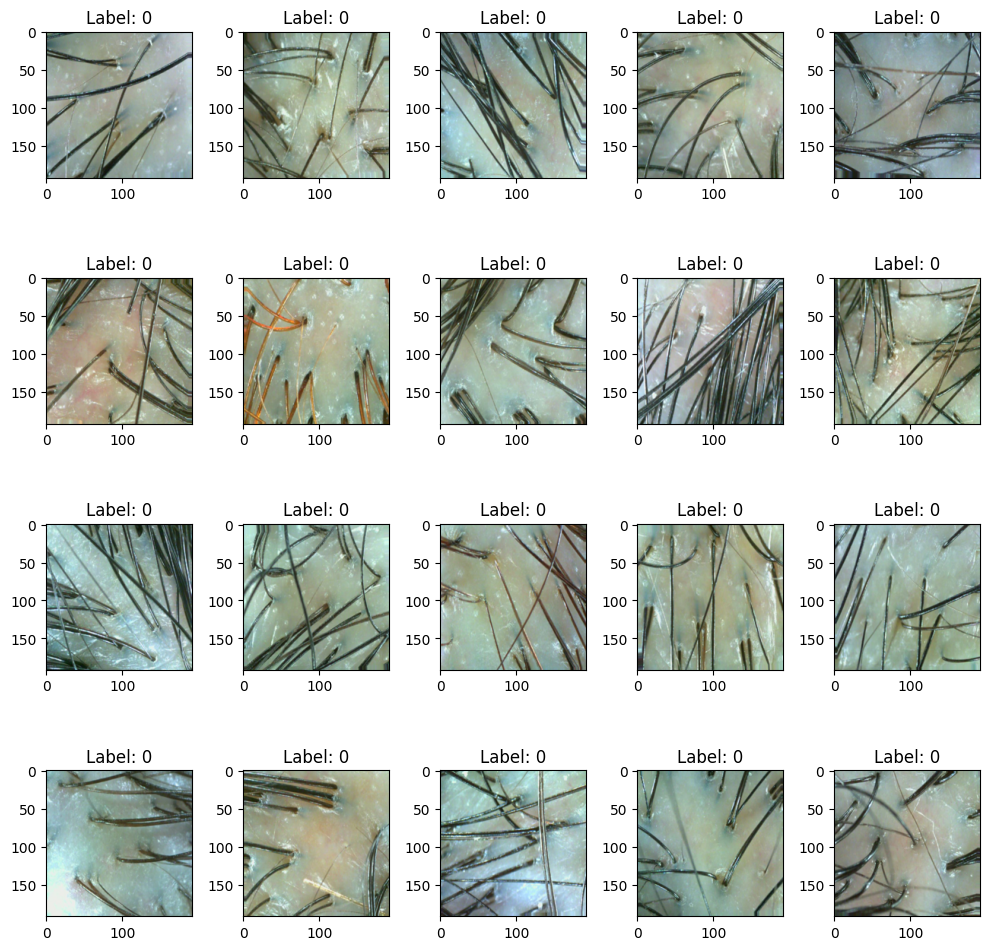

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# npz 파일 로드
data = np.load('0909_1mErythema&follicles_1.npz')

# 이미지 데이터와 라벨 데이터 추출
x = data['x']
y = data['y']

# 라벨 0의 인덱스 추출
label_0_indices = np.where(y == 0)[0]

plt.figure(figsize=(10,10))

# 라벨 0의 이미지 샘플을 시각화
for i in range(20):
    plt.subplot(4, 5, i+1)
    index = label_0_indices[i]
    image = x[index]
    label = y[index]

    plt.imshow(image.astype("uint8"))
    plt.title(f'Label: {label}')
    
plt.tight_layout()    
plt.show()

# **3. 데이터셋 구분 및 실행**

In [6]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental.preprocessing import Normalization

# npz 파일을 불러와 데이터셋 구분
def preprocessing(file, hairClass):
    global shape, x_train, y_train, x_val, y_val, x_test, y_test
    rows = 192                 # 이미지 높이
    cols = 192                 # 이미지 너비
    color = 3                  # 이미지 색공간
    shape = (rows, cols, color)
    hairClass = hairClass      # 출력 데이터 수
    
    # 사진 데이터 읽기
    # 데이터를 읽은 후 해당 파일의 x(이미지)는 x에  y(라벨 0,1,2,3)은 y에 넣는다.
    photo = np.load(file)
    x = photo['x']
    y = photo['y']
    
    # 데이터 1차원에서 3차원 배열로 변환 및 정규화
    x = x.reshape(-1, rows, cols, color)
    x = x.astype('float32') / 255
    
    # 레이블 One-Hot Encoding 변환
    y = to_categorical(y.astype('int32'), hairClass)
    
    # 전체 데이터셋 -> 학습 데이터셋과 테스트 데이터셋으로 구분
    x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                        test_size=0.1, random_state=42)
    
    # 훈련 데이터셋 -> 학습 데이터셋과 검증 데이터셋으로 구분
    # 만약 train_test_split의 test_size속성이 생략되어 있다면 해당 default값은 0.25이다.
    # 만약 train_test_split의 shuffle속성이 생략되어 있다면 해당 default값은 True이다.
    # 즉 데이터셋를 알아서 섞게 된다.
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                      test_size=0.2, random_state=42)
    
    # 데이터셋 확인
    print(x_train.shape, y_train.shape)
    print(x_val.shape, y_val.shape)
    print(x_test.shape, y_test.shape)

# 데이터셋 구분 실행
# preprocessing을 통해 
preprocessing('0909_1mErythema&follicles_1.npz', 4)

(28800, 192, 192, 3) (28800, 4)
(7200, 192, 192, 3) (7200, 4)
(4000, 192, 192, 3) (4000, 4)


# **4. ImageNet: 모델 정의**
### Xception 66부터 해제

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet101, InceptionV3, Xception, EfficientNetB2

from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import regularizers

# trainable 속성을 False로 설정하면 Imagenet 모델의 사전 학습된 가중치를 사용하여 모델의 예측을 생성한다.
# trainable 속성을 True로 설정하면 fine tuning을 수행할 수 있다.

# include_top 속성을 False로 설정하면 기존 Imagenet 모델의 Fully Connected Layer를 제외하고 가져온다.
# include_top 속성을 True로 설정하면 Fully Connected Layer를 포함한 Imagenet 모델을 전부 가져온다.

# VGG16 모델
def def_VGG16(shape, hairClass):
    pre_trained_VGG16 = VGG16(weights='imagenet', include_top=False, input_shape=shape)

    # 전체 동결 해제
    pre_trained_VGG16.trainable = True
    
    # 참조해온 모델 레이어 훈련 여부 확인
    print("VGG16 모델 레이어 체크(전 레이어 동결 해제)")
    for i in pre_trained_VGG16.layers[:]:
        print(i.name, i.trainable)
    
    # 학습 범위 설정 10 ~ 끝까지
    end_layer = 10 # setting N (int) 
    print("\n학습 범위: " + str(end_layer) + " ~ 끝까지")

    # end_layer까지의 레이어는 다시 동결시킴
    for i in pre_trained_VGG16.layers[:end_layer]:
        i.trainable = False
    
    # 최종: 레이어 훈련 여부 확인
    print("\nVGG16 모델 레이어 체크(일부 레이어 동결)")
    for i in pre_trained_VGG16.layers[:]:
        print(i.name, i.trainable)
  
    model = Sequential()
    model.add(pre_trained_VGG16)

    # 레이어 추가(재정의)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(hairClass, activation='softmax'))
  
    # 최종 모델 요약
    print("\n")
    model.summary()

    # 모델 컴파일 
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(learning_rate=0.0001), 
                  metrics=['accuracy'])
  
    return model

# InceptionV3 모델
def def_InceptionV3(shape, hairClass):
    pre_trained_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=shape)
    
    # 전체 동결 해제
    pre_trained_inceptionv3.trainable = True
    
    # 참조해온 모델 레이어 훈련 여부 확인
    print("InceptionV3 모델 레이어 체크(전 레이어 동결 해제)")
    layercount = 0
    for i in pre_trained_inceptionv3.layers[:]:
        print(layercount, ': ', i.name, ',', i.trainable)
        layercount+=1
    
    # 학습 범위 설정 250 ~ 끝까지
    end_layer = 250 # setting N (int) 
    print("\n학습 범위: " + str(end_layer) + " ~ 끝까지")

    # end_layer까지의 레이어는 다시 동결시킴
    for i in pre_trained_inceptionv3.layers[:end_layer]:
        i.trainable = False
    
    # 최종: 레이어 훈련 여부 확인
    print("\nInceptionV3 모델 레이어 체크(일부 레이어 동결)")
    layercount2 = 0
    for i in pre_trained_inceptionv3.layers[:]:
        print(layercount2, ': ', i.name, ',', i.trainable)
        layercount2+=1
    
    model = Sequential()
    model.add(pre_trained_inceptionv3)

    # 레이어 추가(재정의)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(hairClass, activation='softmax'))
  
    # 최종 모델 요약
    print("\n")
    model.summary()

    # 모델 컴파일
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.0001),
                  metrics=['accuracy'])
  
    return model

# Xception 모델
def def_Xception(shape, hairClass):
    pre_trained_Xception = Xception(weights='imagenet', include_top=False, input_shape=shape)
    
    # 전체 동결 해제
    pre_trained_Xception.trainable = True
    
    # 참조해온 모델 레이어 훈련 여부 확인
    print("Xception 모델 레이어 체크(전 레이어 동결 해제)")
    layercount = 0
    for i in pre_trained_Xception.layers[:]:
        print(layercount, ': ', i.name, ',', i.trainable)
        layercount+=1
    
    # 학습 범위 설정 66 ~ 끝까지
    end_layer = 66 # setting N (int) 
    print("\n학습 범위: " + str(end_layer) + " ~ 끝까지")

    # end_layer까지의 레이어는 다시 동결시킴
    for i in pre_trained_Xception.layers[:end_layer]:
        i.trainable = False
    
    # 최종: 레이어 훈련 여부 확인
    print("\nXception 모델 레이어 체크(일부 레이어 동결)")
    layercount2 = 0
    for i in pre_trained_Xception.layers[:]:
        print(layercount2, ': ', i.name, ',', i.trainable)
        layercount2+=1
    
    model = Sequential()
    model.add(pre_trained_Xception)

    # 레이어 추가(재정의)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(hairClass, activation='softmax'))
  
    # 최종 모델 요약
    print("\n")
    model.summary()

    # 모델 컴파일
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.0001),
                  metrics=['accuracy'])
  
    return model

# EfficientNetB2 모델
def def_EfficientNetB2(shape, hairClass):
    pre_trained_EfficientNetB2 = EfficientNetB2(weights='imagenet', include_top=False, input_shape=shape)
    pre_trained_EfficientNetB2.trainable = False
    model = Sequential()
    model.add(pre_trained_EfficientNetB2)

    # 레이어 추가(재정의)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.3))
    model.add(Dense(hairClass, activation='softmax'))

    # 모델 요약 
    model.summary() 

    # 모델 컴파일
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=1e-5),
                  metrics=['accuracy'])
  
    return model

### **4-1. 모델 학습, 저장 정의**

In [8]:
import tensorflow as tf
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

def model_train(x_train, y_train, x_val, y_val, modelFunc, modelName):
    # 모델 생성
    # shape는 데이터셋 구분시 초기화된 변수이다. -> (256, 256, 3)
    model = modelFunc(shape, 4)

    # 모델이 저장될 경로 체크
    model_dir = './model'

    if not os.path.exists(model_dir): # 해당 위치에 경로(폴더)가 없으면
        os.mkdir(model_dir) # 변수명 model_dir로 생성시킴

    # 폴더 경로 변경
    os.chdir('C:/jupyter/capston/bald/erythema&follicles/model')

    # 콜백 함수 설정
    # ModelCheckpoint란 모델을 저장할 때 사용하는 콜백 함수이다.
    # filepath -> 모델 저장 경로
    # monitor -> 모델 저장 시 기준이 되는 값으로 해당 코드에서는 val_loss을 저장하게 된다
    # verbose -> 1=저장되었다는 코맨트 0=코맨트 없음
    # save_besr_only -> monitor되는 값을 기준으로 가장 좋은 값을 저장한다.
    checkpoint = ModelCheckpoint(f'0909_1mEr&Fo_{modelName}_1.h5', monitor='val_loss', verbose=1, save_best_only=True)

    # EarlyStopping이란 특정 시점에서 훈련을 멈추는 콜백 함수이다.
    # monitor -> 모니터링할 값
    # mode -> 관찰항목에 대해 개선이 없다고 판단하기 위한 기준을 설정한다. 
    # monitor에서 설정한 항목이 val_loss 이면 값이 감소되지 않을 때 종료하여야 하므로 min을 설정한다. 입력하지 않으면 auto로 설정해 알아서 판단해준다.
    # patience -> 20번 이상 변동 없으면 중지시킨다. -> 일단 다 출력해본다.
    early_stopping = EarlyStopping(monitor='val_loss', patience=20)

    # 모델 훈련
    with tf.device("/device:GPU:0"):
        history = model.fit(x_train, y_train,
                            batch_size=16, 
                            epochs=30,
                            verbose=1,
                            validation_data=(x_val, y_val))
        
  
    # 모델 저장
    model.save(f'0909_1mEr&Fo_{modelName}_1.h5')

    return model, history

### **모델 생성 및 훈련**

### Xception 모델 체크

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet101, InceptionV3, Xception, EfficientNetB2

pre_trained_Xception = Xception(weights='imagenet', include_top=False, input_shape=shape)

layers = pre_trained_Xception.layers

# 레이어 수 세기
num_layers = len(layers)
print("Number of layers in Xception:", num_layers)
print("\n")

pre_trained_Xception.summary()

Number of layers in Xception: 132


Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 192, 192, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 95, 95, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 95, 95, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 95, 95, 32)   0           block1_conv1_bn[0][0]            
_______________________________________________________

### **Xception 모델 생성 및 훈련**

In [10]:
import os
model_Xception, history_Xception = model_train(x_train, y_train, x_val, y_val, def_Xception, 'Xception')

Xception 모델 레이어 체크(전 레이어 동결 해제)
0 :  input_2 , True
1 :  block1_conv1 , True
2 :  block1_conv1_bn , True
3 :  block1_conv1_act , True
4 :  block1_conv2 , True
5 :  block1_conv2_bn , True
6 :  block1_conv2_act , True
7 :  block2_sepconv1 , True
8 :  block2_sepconv1_bn , True
9 :  block2_sepconv2_act , True
10 :  block2_sepconv2 , True
11 :  block2_sepconv2_bn , True
12 :  conv2d_4 , True
13 :  block2_pool , True
14 :  batch_normalization_4 , True
15 :  add_12 , True
16 :  block3_sepconv1_act , True
17 :  block3_sepconv1 , True
18 :  block3_sepconv1_bn , True
19 :  block3_sepconv2_act , True
20 :  block3_sepconv2 , True
21 :  block3_sepconv2_bn , True
22 :  conv2d_5 , True
23 :  block3_pool , True
24 :  batch_normalization_5 , True
25 :  add_13 , True
26 :  block4_sepconv1_act , True
27 :  block4_sepconv1 , True
28 :  block4_sepconv1_bn , True
29 :  block4_sepconv2_act , True
30 :  block4_sepconv2 , True
31 :  block4_sepconv2_bn , True
32 :  conv2d_6 , True
33 :  block4_pool , True
34 : 

Epoch 1/30
1800/1800 [==============================] - 220s 118ms/step - loss: 0.6645 - accuracy: 0.7139 - val_loss: 0.4378 - val_accuracy: 0.8211
Epoch 2/30
1800/1800 [==============================] - 215s 119ms/step - loss: 0.3021 - accuracy: 0.8825 - val_loss: 0.3580 - val_accuracy: 0.8629
Epoch 3/30
1800/1800 [==============================] - 216s 120ms/step - loss: 0.1433 - accuracy: 0.9481 - val_loss: 0.3931 - val_accuracy: 0.8761
Epoch 4/30
1800/1800 [==============================] - 218s 121ms/step - loss: 0.0932 - accuracy: 0.9673 - val_loss: 0.3862 - val_accuracy: 0.8894
Epoch 5/30
1800/1800 [==============================] - 218s 121ms/step - loss: 0.0750 - accuracy: 0.9741 - val_loss: 0.3568 - val_accuracy: 0.8892
Epoch 6/30
1800/1800 [==============================] - 218s 121ms/step - loss: 0.0613 - accuracy: 0.9791 - val_loss: 0.3617 - val_accuracy: 0.8951
Epoch 7/30
1800/1800 [==============================] - 218s 121ms/step - loss: 0.0557 - accuracy: 0.9805 - val_

C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


### **4-2. history 확인**

In [11]:
# 나머지 모델 또한 동일함

print(history_Xception.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### **5. 그래프 정의**

In [12]:
import matplotlib.pyplot as plt

def model_plot(history, modelName):
    # loss
    y_loss = history.history['loss']
    y_vloss = history.history['val_loss']
  
    x_len = range(1,len(y_loss) + 1)

    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(1, 2, 1)

    ax.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
    ax.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title(modelName + ': train&val loss')
    ax.legend()

    # accuracy
    y_acc = history.history['accuracy']
    y_vacc = history.history['val_accuracy']
  
    x_len = range(1, len(y_acc) + 1)
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_len, y_acc, marker='.', c='blue', label='train_set_acc')
    ax.plot(x_len, y_vacc, marker='.', c='red', label='val_set_acc')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title(modelName + ': train&val accuracy')
    ax.legend()

    plt.tight_layout()
    plt.show()

### **5-1. 그래프 출력**

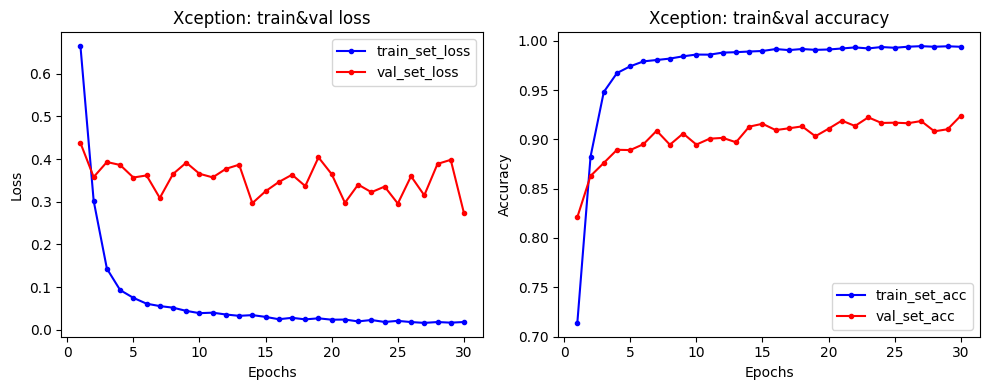

In [13]:
model_plot(history_Xception, 'Xception')

### **6. 혼돈행렬 정의**

In [14]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# history와 model을 이용한 방법
def confusionMatrix_model(model, modelName, x_test, y_test):
    # 모델을 이용해 테스트 데이터셋에 대한 예측 수행
    y_pred = model.predict(x_test)

    # softmax 확률 출력을 가장 높은 확률을 가진 클래스로 변환
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Labeling
    label = ['normal', 'mild', 'moderate', 'severe']
    
    # 혼동 행렬 생성
    cm = confusion_matrix(y_true, y_pred_classes)

    # 혼동 행렬 시각화
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(modelName + ' confusionMatrix')
    plt.show()

    # 분류 보고서 출력
    print(classification_report(y_true, y_pred_classes))

    
# 생성된 .h5 파일을 이용하여 생성
def confusionMatrix_h5(model_path, modelName, x_test, y_test):
    
    # 모델 로드
    model = load_model(model_path)

    # 테스트 데이터셋에 대한 예측 수행
    y_pred = model.predict(x_test)

    # 예측 결과를 가장 높은 확률을 가진 클래스로 변환
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # 혼동 행렬 생성
    cm = confusion_matrix(y_true, y_pred_classes)

    # 혼동 행렬 시각화
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(modelName + ' confusionMatrix')
    plt.show()

### **6-1. 혼돈행렬 출력**

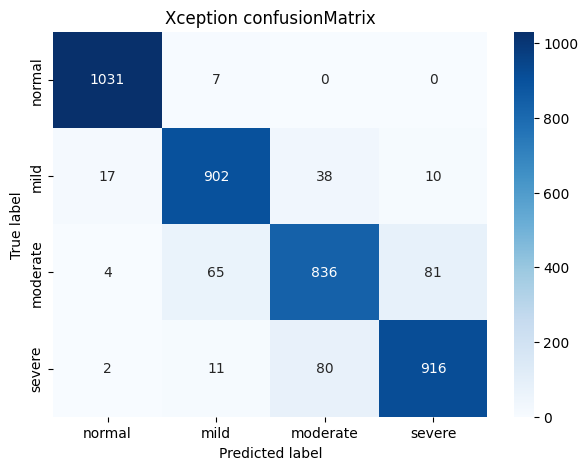

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1038
           1       0.92      0.93      0.92       967
           2       0.88      0.85      0.86       986
           3       0.91      0.91      0.91      1009

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000



In [15]:
with tf.device("/device:CPU:0"):
    confusionMatrix_model(model_Xception, 'Xception', x_test, y_test)

# **7. 모델 evaluate 정의**

In [16]:
def model_evaluate(model, x_test, y_test):
    test_result = model.evaluate(x_test, y_test, verbose=1)
    print("acc: ", test_result[1], 'loss: ', test_result[0])

    return test_result[1], test_result[0]

# **7-1. 모델 evaluate 출력**

In [17]:
with tf.device("/device:CPU:0"):
    accuracy_Xception, loss_Xception = model_evaluate(model_Xception, x_test, y_test)

125/125 [==============================] - 96s 763ms/step - loss: 0.2762 - accuracy: 0.9212
acc:  0.9212499856948853 loss:  0.2761957049369812
